In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import  SelectFromModel,variance_threshold
import numpy as np
from numpy import sort
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('importing models......')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import roc_auc_score,f1_score ,accuracy_score,precision_score,recall_score
from sklearn.feature_selection import SelectFromModel
import category_encoders as ce

import warnings 
warnings.filterwarnings('ignore')
print('we are ready boss......')

importing models......
we are ready boss......


In [2]:
pd.set_option('display.max_columns',70)

In [3]:
train = pd.read_csv("train_values.csv")
train_label = pd.read_csv("train_labels.csv")
test = pd.read_csv("test_values.csv")
sample_sub = pd.read_csv("submission_format.csv")

In [4]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

In [6]:
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,2.036228,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,0.511351,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,2.000000,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,2.000000,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


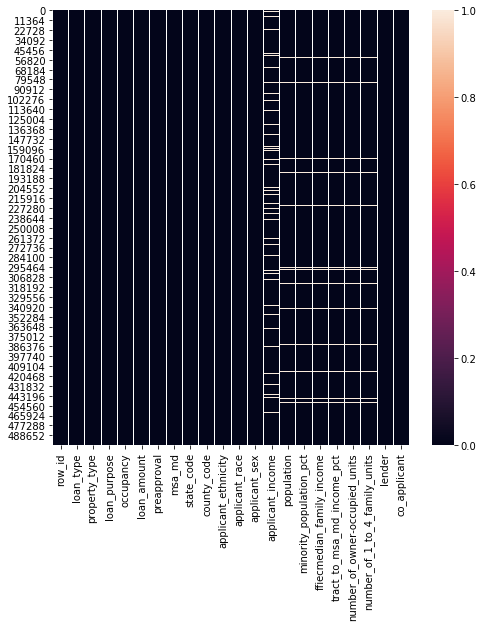

In [7]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

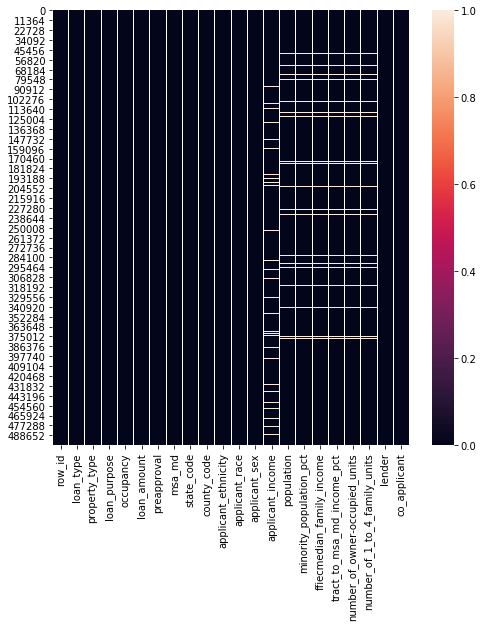

In [13]:
plt.figure(figsize=(8, 8))
sns.heatmap(test.isnull())

## taking care of missing values in 
['applicant_income', 'population', 'minority_population_pct',
'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

In [8]:
train= pd.concat([train,train_label.accepted],axis=1)

In [9]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [10]:
train.isnull().mean()

row_id                            0.000000
loan_type                         0.000000
property_type                     0.000000
loan_purpose                      0.000000
occupancy                         0.000000
loan_amount                       0.000000
preapproval                       0.000000
msa_md                            0.000000
state_code                        0.000000
county_code                       0.000000
applicant_ethnicity               0.000000
applicant_race                    0.000000
applicant_sex                     0.000000
applicant_income                  0.079896
population                        0.044930
minority_population_pct           0.044932
ffiecmedian_family_income         0.044880
tract_to_msa_md_income_pct        0.045028
number_of_owner-occupied_units    0.045130
number_of_1_to_4_family_units     0.045060
lender                            0.000000
co_applicant                      0.000000
accepted                          0.000000
dtype: floa

## 1.0 dealing with the missing data in applicant_income

In [11]:
train.applicant_income.isnull().sum()

39948

In [12]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [13]:
train_applicant_income = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income']]
train_applicant_income.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_applicant_income, train.accepted, test_size=0.33, random_state=42)

In [15]:
def impute_na(df,variable,mean,median): 
    df[variable+'_mean'] = df[variable].fillna(mean)
    df[variable+'_median'] = df[variable].fillna(median)

In [16]:
mean = X_train.applicant_income.mean()
median = X_train.applicant_income.median()
mean,median

(102.38897689426155, 74.0)

In [17]:
impute_na(X_train,'applicant_income',mean,median)

In [18]:
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_mean,applicant_income_median
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,95.0,95.0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,51.0,51.0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,756.0,756.0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,156.0,156.0
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,43.0,43.0


In [19]:
impute_na(X_test,'applicant_income',mean,median)

In [20]:
#addition missingness features

# create variable indicating missingness in applicant_income
X_train['applicant_income_NA'] = np.where(X_train.applicant_income.isnull(),1,0)
X_test['applicant_income_NA'] = np.where(X_test.applicant_income.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_mean,applicant_income_median,applicant_income_NA
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,95.0,95.0,0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,51.0,51.0,0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,756.0,756.0,0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,156.0,156.0,0
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,43.0,43.0,0


In [21]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols


## logistic reg 1.0

In [28]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['applicant_income','applicant_income_median','applicant_income_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_median','applicant_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_median','applicant_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['applicant_income','applicant_income_mean','applicant_income_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_mean','applicant_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_mean','applicant_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['applicant_income','applicant_income_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['applicant_income','applicant_income_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['applicant_income','applicant_income_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['applicant_income','applicant_income_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6558838493888023
Test set mean imputation
Logistic Reg roc_auc: 0.6558853965781354

Train set median imputation
Logistic Reg roc-auc: 0.6552850004442998
Test set median imputation
Logistic Reg roc_auc: 0.6552850752893493

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6581682256888779
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6578678190862997

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6581681095648247
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6578677259351216



## concluding on applicant_income missing values
the missing data in the applicant_income has predictive powers to the target variable 

best approach to treat applicant_income missing values = mean imputation and missingness

In [22]:
# inplementation based on the conclussion above in applicant_income
train['applicant_income_NA'] = np.where(train.applicant_income.isnull(),1,0)
test['applicant_income_NA'] = np.where(test.applicant_income.isnull(),1,0)
train.applicant_income.fillna(train.applicant_income.mean(),inplace=True)
test.applicant_income.fillna(train.applicant_income.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0


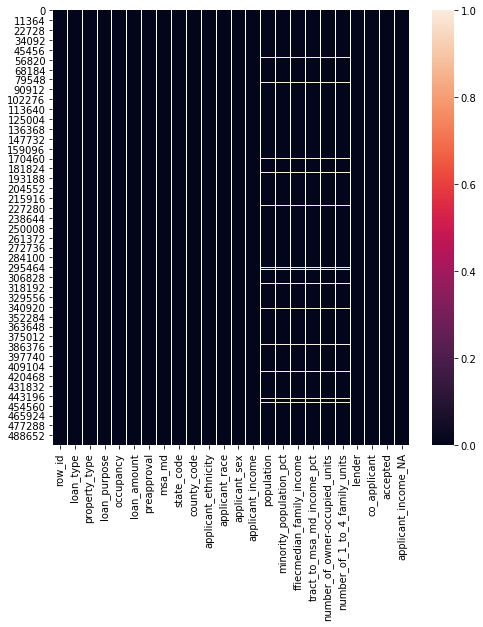

In [23]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.1 taking care of missing values in population

In [24]:
train.population.isnull().mean()

0.04493

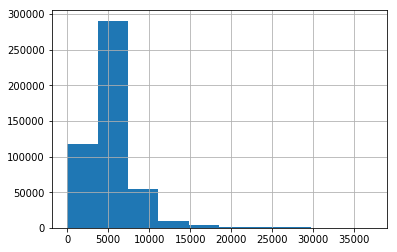

In [25]:
train.population.hist()

In [26]:
train.population.mean(),train.population.median()

(5416.833955626289, 4975.0)

In [27]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA'],
      dtype='object')

In [28]:
train_population = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income','applicant_income_NA', 'population']]
train_population.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,0,6203.0
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,0,5774.0
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,0,6094.0
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,0,6667.0
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,0,6732.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_population, train.accepted, test_size=0.33, random_state=42)

In [30]:
mean = X_train.population.mean()
median = X_train.population.median()
mean,median

(5420.958475940425, 4975.0)

In [31]:
impute_na(X_train,'population',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_mean,population_median
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,0,3022.0,3022.000000,3022.0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,0,2735.0,2735.000000,2735.0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,0,6133.0,6133.000000,6133.0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,0,NaN,5420.958476,4975.0
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,0,13630.0,13630.000000,13630.0


In [32]:
impute_na(X_test,'population',mean,median)

In [33]:
#addition missingness features

# create variable indicating missingness in population
X_train['population_NA'] = np.where(X_train.population.isnull(),1,0)
X_test['population_NA'] = np.where(X_test.population.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_mean,population_median,population_NA
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,0,3022.0,3022.000000,3022.0,0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,0,2735.0,2735.000000,2735.0,0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,0,6133.0,6133.000000,6133.0,0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,0,NaN,5420.958476,4975.0,1
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,0,13630.0,13630.000000,13630.0,0


In [34]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## logistic reg 1.1

In [42]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['population','population_median','population_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['population','population_median','population_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['population','population_median','population_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['population','population_mean','population_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['population','population_mean','population_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['population','population_mean','population_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['population','population_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['population','population_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['population','population_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()


logit.fit(X_train.drop(['population','population_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['population','population_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['population','population_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6584834173428608
Test set mean imputation
Logistic Reg roc_auc: 0.658098282226762

Train set median imputation
Logistic Reg roc-auc: 0.6586490701938451
Test set median imputation
Logistic Reg roc_auc: 0.6582453641168541

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.679887172794193
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6795690666323614

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6798871655943592
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6795690641346168



## concluding on population missing values
the missing data in the population has predictive powers to the target variable 

best approach to treat population missing values = mean imputation and missingness

In [35]:
# inplementation based on the conclussion above in applicant_income
train['population_NA'] = np.where(train.population.isnull(),1,0)
test['population_NA'] = np.where(test.population.isnull(),1,0)
train.population.fillna(train.population.mean(),inplace=True)
test.population.fillna(train.population.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0


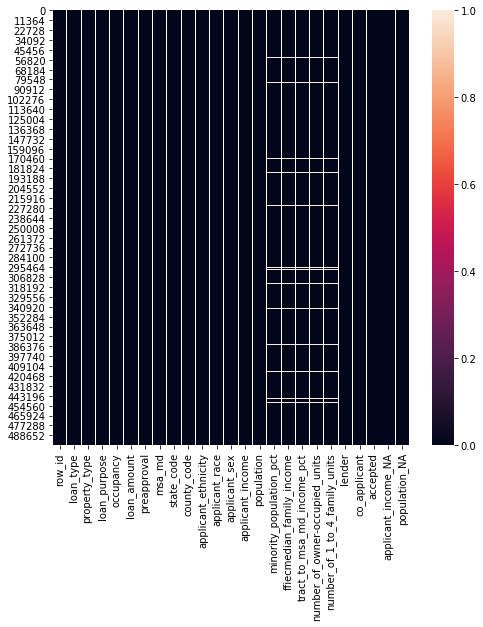

In [44]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.2 taking care of missing values in minority_population_pct

In [36]:
train.minority_population_pct.isnull().mean()

0.044932

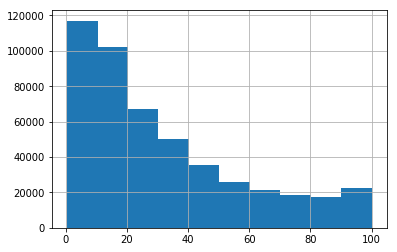

In [37]:
train.minority_population_pct.hist()

In [38]:
train.minority_population_pct.mean(),train.minority_population_pct.median()

(31.617310254347984, 22.901)

In [39]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA'],
      dtype='object')

In [40]:
train_minority_population_pct = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income','applicant_income_NA', 'population','population_NA','minority_population_pct']]
train_minority_population_pct.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,0,6203.0,0,44.230
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,0,5774.0,0,15.905
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,0,6094.0,0,61.270
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,0,6667.0,0,6.246
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,0,6732.0,0,100.000


In [41]:
X_train, X_test, y_train, y_test = train_test_split(train_minority_population_pct, train.accepted, test_size=0.33, random_state=42)

In [42]:
mean = X_train.minority_population_pct.mean()
median = X_train.minority_population_pct.median()
mean,median

(31.664889411566936, 22.945999999999998)

In [43]:
impute_na(X_train,'minority_population_pct',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,minority_population_pct_mean,minority_population_pct_median
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,0,3022.000000,0,20.752,20.752000,20.752
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,0,2735.000000,0,34.215,34.215000,34.215
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,0,6133.000000,0,14.266,14.266000,14.266
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,0,5416.833956,1,NaN,31.664889,22.946
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,0,13630.000000,0,7.346,7.346000,7.346


In [44]:
impute_na(X_test,'minority_population_pct',mean,median)

In [45]:
#addition missingness features

# create variable indicating missingness in population
X_train['minority_population_pct_NA'] = np.where(X_train.minority_population_pct.isnull(),1,0)
X_test['minority_population_pct_NA'] = np.where(X_test.minority_population_pct.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,minority_population_pct_mean,minority_population_pct_median,minority_population_pct_NA
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,0,3022.000000,0,20.752,20.752000,20.752,0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,0,2735.000000,0,34.215,34.215000,34.215,0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,0,6133.000000,0,14.266,14.266000,14.266,0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,0,5416.833956,1,NaN,31.664889,22.946,1
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,0,13630.000000,0,7.346,7.346000,7.346,0


In [46]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.2 logistic reg

In [48]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_median','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_mean','minority_population_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['minority_population_pct','minority_population_pct_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['minority_population_pct','minority_population_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6854141537078935
Logistic Reg accuracy: 0.6322298507462687
Test set mean imputation
Logistic Reg roc_auc: 0.6842187372178613
Logistic Reg accuracy: 0.6301878787878787

Train set median imputation
Logistic Reg roc-auc: 0.6854143788274515
Logistic Reg accuracy: 0.6322268656716418
Test set median imputation
Logistic Reg roc_auc: 0.6842186926992383
Logistic Reg accuracy: 0.6302

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6854187275627521
Logistic Reg accuracy: 0.6322149253731343
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.684219263654251
Logistic Reg accuracy: 0.6301757575757576

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6854185526994601
Logistic Reg accuracy: 0.632220895522388
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6842191339184619
Logistic Reg accuracy: 0.6301818181818182



## concluding on minority_population_pct missing values
the missing data in the minority_population_pct has predictive powers to the target variable 

best approach to treat minority_population_pct missing values = median imputation

In [47]:
# inplementation based on the conclussion above in minority_population_pct
train.minority_population_pct.fillna(train.minority_population_pct.median(),inplace=True)
test.minority_population_pct.fillna(train.minority_population_pct.median(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0


## note that addition pf missingness for minority_population_pct reduces the accuracy 
## because the missingness has been captured by the previous case 
## since missingness is across same rows 


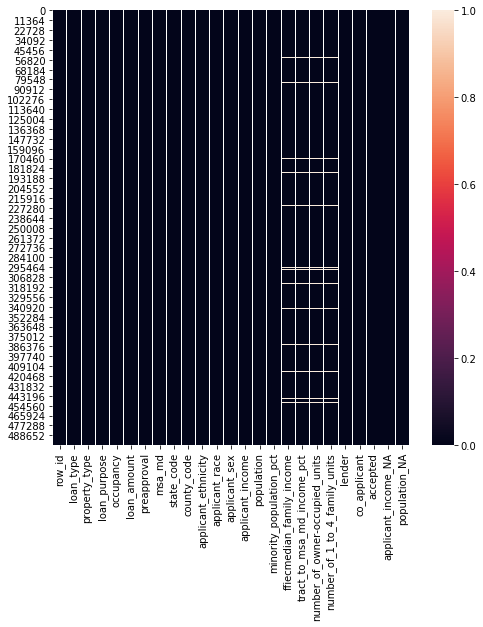

In [58]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.3 taking care of missing values in ffiecmedian_family_income

In [48]:
train.ffiecmedian_family_income.isnull().mean()

0.04488

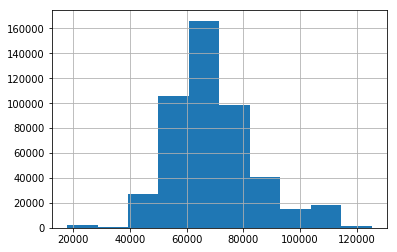

In [49]:
train.ffiecmedian_family_income.hist()

In [50]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA'],
      dtype='object')

In [51]:
train_ffiecmedian_family_income = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income','applicant_income_NA', 'population','population_NA','minority_population_pct','ffiecmedian_family_income']]
train_ffiecmedian_family_income.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,ffiecmedian_family_income
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,0,6203.0,0,44.230,60588.0
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,0,5774.0,0,15.905,54821.0
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,0,6094.0,0,61.270,67719.0
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,0,6667.0,0,6.246,78439.0
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,0,6732.0,0,100.000,63075.0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(train_ffiecmedian_family_income, train.accepted, test_size=0.33, random_state=42)

In [53]:
mean = X_train.ffiecmedian_family_income.mean()
median = X_train.ffiecmedian_family_income.median()
mean,median

(69219.91141796269, 67504.0)

In [54]:
impute_na(X_train,'ffiecmedian_family_income',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,ffiecmedian_family_income,ffiecmedian_family_income_mean,ffiecmedian_family_income_median
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,0,3022.000000,0,20.752,78776.0,78776.000000,78776.0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,0,2735.000000,0,34.215,55879.0,55879.000000,55879.0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,0,6133.000000,0,14.266,69780.0,69780.000000,69780.0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,0,5416.833956,1,22.901,NaN,69219.911418,67504.0
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,0,13630.000000,0,7.346,69907.0,69907.000000,69907.0


In [55]:
impute_na(X_test,'ffiecmedian_family_income',mean,median)

In [56]:
#addition missingness features

# create variable indicating missingness in population
X_train['ffiecmedian_family_income_NA'] = np.where(X_train.ffiecmedian_family_income.isnull(),1,0)
X_test['ffiecmedian_family_income_NA'] = np.where(X_test.ffiecmedian_family_income.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,applicant_income_NA,population,population_NA,minority_population_pct,ffiecmedian_family_income,ffiecmedian_family_income_mean,ffiecmedian_family_income_median,ffiecmedian_family_income_NA
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,0,3022.000000,0,20.752,78776.0,78776.000000,78776.0,0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,0,2735.000000,0,34.215,55879.0,55879.000000,55879.0,0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,0,6133.000000,0,14.266,69780.0,69780.000000,69780.0,0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,0,5416.833956,1,22.901,NaN,69219.911418,67504.0,1
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,0,13630.000000,0,7.346,69907.0,69907.000000,69907.0,0


In [57]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.3 logistic reg

In [69]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean','ffiecmedian_family_income_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['ffiecmedian_family_income','ffiecmedian_family_income_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6866887593312359
Logistic Reg accuracy: 0.633020895522388
Test set mean imputation
Logistic Reg roc_auc: 0.6851716028041837
Logistic Reg accuracy: 0.6309575757575757

Train set median imputation
Logistic Reg roc-auc: 0.6866895835696432
Logistic Reg accuracy: 0.6330149253731343
Test set median imputation
Logistic Reg roc_auc: 0.6851724505680598
Logistic Reg accuracy: 0.6309636363636364

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6867239061757012
Logistic Reg accuracy: 0.6330537313432836
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.685176072150691
Logistic Reg accuracy: 0.6310060606060606

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6867243087604714
Logistic Reg accuracy: 0.6330567164179104
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6851764122847245
Logistic Reg accuracy: 0.6310121212121212



## concluding on ffiecmedian_family_income missing values
the missing data in the ffiecmedian_family_income has predictive powers to the target variable 

best approach to treat ffiecmedian_family_income missing values = median imputation and missingness

In [58]:
# inplementation based on the conclussion above in applicant_income
train['ffiecmedian_family_income_NA'] = np.where(train.ffiecmedian_family_income.isnull(),1,0)
test['ffiecmedian_family_income_NA'] = np.where(test.ffiecmedian_family_income.isnull(),1,0)
train.ffiecmedian_family_income.fillna(train.ffiecmedian_family_income.mean(),inplace=True)
test.ffiecmedian_family_income.fillna(train.ffiecmedian_family_income.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0,0


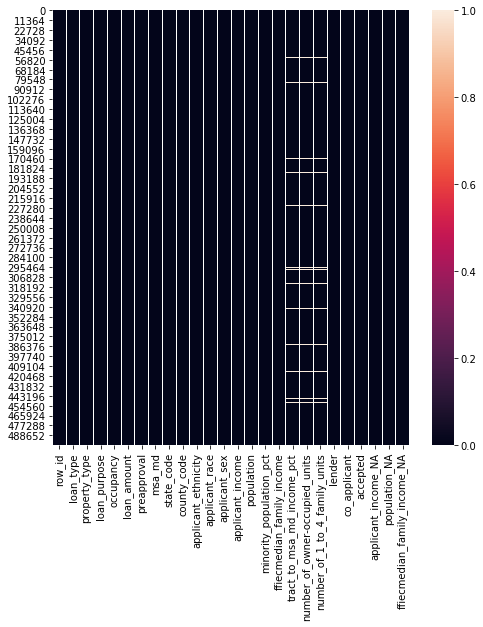

In [71]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.4 taking care of missing values in tract_to_msa_md_income_pct

In [59]:
train.tract_to_msa_md_income_pct.isnull().mean()

0.045028

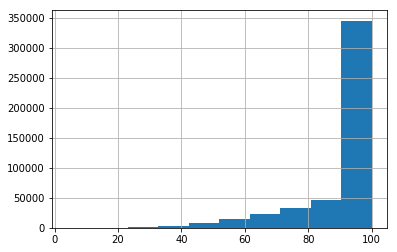

In [60]:
train.tract_to_msa_md_income_pct.hist()

In [376]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA'],
      dtype='object')

In [377]:
train_tract_to_msa_md_income_pct = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income','applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA','tract_to_msa_md_income_pct']]
train_tract_to_msa_md_income_pct.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,0,0,0,50.933
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,0,0,0,100.000
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,0,0,0,100.000
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,0,0,0,100.000
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,0,0,0,82.200


In [378]:
X_train, X_test, y_train, y_test = train_test_split(train_tract_to_msa_md_income_pct, train.accepted, test_size=0.33, random_state=42)

In [379]:
mean = X_train.tract_to_msa_md_income_pct.mean()
median = X_train.tract_to_msa_md_income_pct.median()
mean,median

(91.82864237015202, 100.0)

In [380]:
impute_na(X_train,'tract_to_msa_md_income_pct',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct,tract_to_msa_md_income_pct_mean,tract_to_msa_md_income_pct_median
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,3022.000000,20.752,78776.000000,0,0,0,84.373,84.373000,84.373
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,2735.000000,34.215,55879.000000,0,0,0,95.031,95.031000,95.031
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,6133.000000,14.266,69780.000000,0,0,0,100.000,100.000000,100.000
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,5416.833956,22.901,69235.603298,0,1,1,NaN,91.828642,100.000
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,13630.000000,7.346,69907.000000,0,0,0,100.000,100.000000,100.000


In [381]:
impute_na(X_test,'tract_to_msa_md_income_pct',mean,median)

In [382]:
#addition missingness features

# create variable indicating missingness in population
X_train['tract_to_msa_md_income_pct_NA'] = np.where(X_train.tract_to_msa_md_income_pct.isnull(),1,0)
X_test['tract_to_msa_md_income_pct_NA'] = np.where(X_test.tract_to_msa_md_income_pct.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct,tract_to_msa_md_income_pct_mean,tract_to_msa_md_income_pct_median,tract_to_msa_md_income_pct_NA
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,3022.000000,20.752,78776.000000,0,0,0,84.373,84.373000,84.373,0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,2735.000000,34.215,55879.000000,0,0,0,95.031,95.031000,95.031,0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,6133.000000,14.266,69780.000000,0,0,0,100.000,100.000000,100.000,0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,5416.833956,22.901,69235.603298,0,1,1,NaN,91.828642,100.000,1
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,13630.000000,7.346,69907.000000,0,0,0,100.000,100.000000,100.000,0


In [383]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.4 logistic reg

In [82]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean','tract_to_msa_md_income_pct_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['tract_to_msa_md_income_pct','tract_to_msa_md_income_pct_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6880718011535056
Logistic Reg accuracy: 0.6341223880597014
Test set mean imputation
Logistic Reg roc_auc: 0.6865322927698112
Logistic Reg accuracy: 0.6309575757575757

Train set median imputation
Logistic Reg roc-auc: 0.688070782911654
Logistic Reg accuracy: 0.6341313432835821
Test set median imputation
Logistic Reg roc_auc: 0.6865316799408464
Logistic Reg accuracy: 0.6309575757575757

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6880825459075609
Logistic Reg accuracy: 0.6341044776119403
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6865371920222288
Logistic Reg accuracy: 0.6309818181818182

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6880825836175818
Logistic Reg accuracy: 0.6341044776119403
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6865372246398338
Logistic Reg accuracy: 0.6309818181818182



## concluding on tract_to_msa_md_income_pct missing values
the missing data in the tract_to_msa_md_income_pct has predictive powers to the target variable 

best approach to treat tract_to_msa_md_income_pct missing values = median imputation and missingness

In [384]:
# inplementation based on the conclussion above in applicant_income
train['tract_to_msa_md_income_pct_NA'] = np.where(train.tract_to_msa_md_income_pct.isnull(),1,0)
test['tract_to_msa_md_income_pct_NA'] = np.where(test.tract_to_msa_md_income_pct.isnull(),1,0)
train.tract_to_msa_md_income_pct.fillna(train.tract_to_msa_md_income_pct.median(),inplace=True)
test.tract_to_msa_md_income_pct.fillna(train.tract_to_msa_md_income_pct.median(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0,0,0


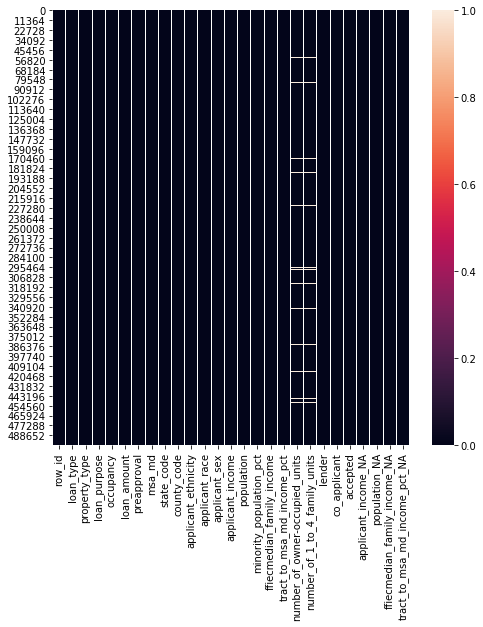

In [69]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.5 taking care of missing values in number_of_owner-occupied_units

In [385]:
train['number_of_owner-occupied_units'].isnull().mean()

0.04513

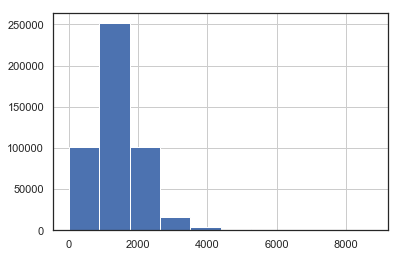

In [386]:
train['number_of_owner-occupied_units'].hist()

In [387]:
list(train.columns)

['row_id',
 'loan_type',
 'property_type',
 'loan_purpose',
 'occupancy',
 'loan_amount',
 'preapproval',
 'msa_md',
 'state_code',
 'county_code',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'applicant_income',
 'population',
 'minority_population_pct',
 'ffiecmedian_family_income',
 'tract_to_msa_md_income_pct',
 'number_of_owner-occupied_units',
 'number_of_1_to_4_family_units',
 'lender',
 'co_applicant',
 'accepted',
 'applicant_income_NA',
 'population_NA',
 'ffiecmedian_family_income_NA',
 'tract_to_msa_md_income_pct_NA']

In [388]:
train.columns=['row_id','loan_type','property_type','loan_purpose','occupancy','loan_amount','preapproval','msa_md','state_code','county_code','applicant_ethnicity','applicant_race',
 'applicant_sex','applicant_income','population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner_occupied_units','number_of_1_to_4_family_units',
 'lender','co_applicant','accepted','applicant_income_NA','population_NA','ffiecmedian_family_income_NA','tract_to_msa_md_income_pct_NA']

In [389]:
test.columns=['row_id','loan_type',
 'property_type','loan_purpose',
 'occupancy','loan_amount','preapproval','msa_md','state_code','county_code','applicant_ethnicity','applicant_race','applicant_sex','applicant_income','population','minority_population_pct',
 'ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner_occupied_units','number_of_1_to_4_family_units','lender','co_applicant','applicant_income_NA',
 'population_NA','ffiecmedian_family_income_NA','tract_to_msa_md_income_pct_NA']

In [390]:
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0,0,0


In [391]:
train_number_of_owner_occupied_units = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner_occupied_units','applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA',
       'tract_to_msa_md_income_pct_NA']]
train_number_of_owner_occupied_units.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,0,0,0,0
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,0,0,0,0
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,0,0,0,0
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,0,0,0,0
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,0,0,0,0


In [392]:
X_train, X_test, y_train, y_test = train_test_split(train_number_of_owner_occupied_units, train.accepted, test_size=0.33, random_state=42)

In [393]:
mean = X_train.number_of_owner_occupied_units.mean()
median = X_train.number_of_owner_occupied_units.median()
mean,median

(1428.4156868139598, 1327.0)

In [394]:
impute_na(X_train,'number_of_owner_occupied_units',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_mean,number_of_owner_occupied_units_median
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,3022.000000,20.752,78776.000000,84.373,1155.0,0,0,0,0,1155.000000,1155.0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,2735.000000,34.215,55879.000000,95.031,790.0,0,0,0,0,790.000000,790.0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,6133.000000,14.266,69780.000000,100.000,1670.0,0,0,0,0,1670.000000,1670.0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,5416.833956,22.901,69235.603298,100.000,NaN,0,1,1,1,1428.415687,1327.0
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,13630.000000,7.346,69907.000000,100.000,4104.0,0,0,0,0,4104.000000,4104.0


In [395]:
impute_na(X_test,'number_of_owner_occupied_units',mean,median)

In [396]:
#addition missingness features

# create variable indicating missingness in population
X_train['number_of_owner_occupied_units_NA'] = np.where(X_train.number_of_owner_occupied_units.isnull(),1,0)
X_test['number_of_owner_occupied_units_NA'] = np.where(X_test.number_of_owner_occupied_units.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_mean,number_of_owner_occupied_units_median,number_of_owner_occupied_units_NA
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,3022.000000,20.752,78776.000000,84.373,1155.0,0,0,0,0,1155.000000,1155.0,0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,2735.000000,34.215,55879.000000,95.031,790.0,0,0,0,0,790.000000,790.0,0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,6133.000000,14.266,69780.000000,100.000,1670.0,0,0,0,0,1670.000000,1670.0,0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,5416.833956,22.901,69235.603298,100.000,NaN,0,1,1,1,1428.415687,1327.0,1
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,13630.000000,7.346,69907.000000,100.000,4104.0,0,0,0,0,4104.000000,4104.0,0


In [397]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.5 logistic reg

In [98]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean','number_of_owner_occupied_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_owner_occupied_units','number_of_owner_occupied_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6884376629927774
Logistic Reg accuracy: 0.6339313432835821
Test set mean imputation
Logistic Reg roc_auc: 0.6866795207044948
Logistic Reg accuracy: 0.6315090909090909

Train set median imputation
Logistic Reg roc-auc: 0.6884371067877897
Logistic Reg accuracy: 0.633934328358209
Test set median imputation
Logistic Reg roc_auc: 0.6866795875558924
Logistic Reg accuracy: 0.6315151515151515

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6884412287996088
Logistic Reg accuracy: 0.6339432835820895
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6866795086565506
Logistic Reg accuracy: 0.6315333333333333

Train set median imputation and missingness
Logistic Reg roc-auc: 0.688440438493092
Logistic Reg accuracy: 0.6339283582089552
Test set median imputation and missingness
Logistic Reg roc_auc: 0.6866787563946709
Logistic Reg accuracy: 0.6315151515151515



## concluding on number_of_owner_occupied_units missing values
the missing data in the number_of_owner_occupied_units has predictive powers to the target variable 

best approach to treat number_of_owner_occupied_units missing values = mean imputation and missingness

In [398]:
# inplementation based on the conclussion above in applicant_income
train['number_of_owner_occupied_units_NA'] = np.where(train.number_of_owner_occupied_units.isnull(),1,0)
test['number_of_owner_occupied_units_NA'] = np.where(test.number_of_owner_occupied_units.isnull(),1,0)
train.number_of_owner_occupied_units.fillna(train.number_of_owner_occupied_units.mean(),inplace=True)
test.number_of_owner_occupied_units.fillna(train.number_of_owner_occupied_units.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0


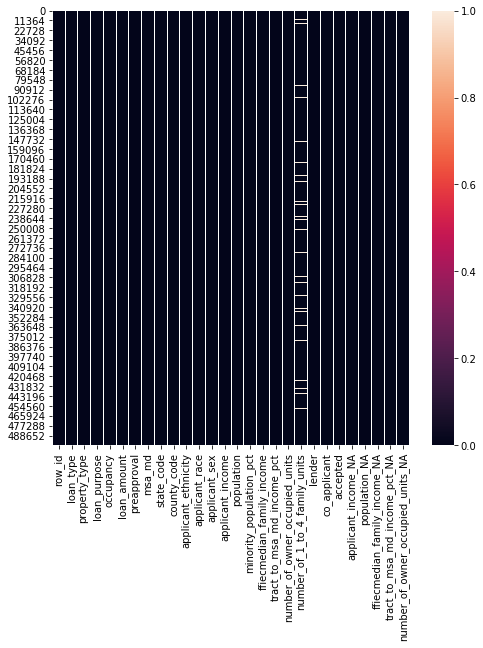

In [100]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

## 1.5 taking care of missing values in number_of_1_to_4_family_units

In [399]:
train.number_of_1_to_4_family_units.isnull().mean()

0.04506

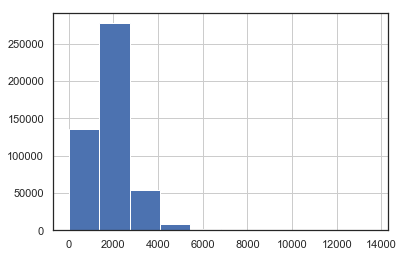

In [400]:
train.number_of_1_to_4_family_units.hist()

In [401]:
train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA',
       'tract_to_msa_md_income_pct_NA', 'number_of_owner_occupied_units_NA'],
      dtype='object')

In [402]:
train_number_of_1_to_4_family_units = train[['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'applicant_income_NA',
       'population_NA', 'ffiecmedian_family_income_NA',
       'tract_to_msa_md_income_pct_NA', 'number_of_owner_occupied_units_NA']]
train_number_of_1_to_4_family_units.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA
0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,0,0,0,0,0
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,0,0,0,0,0
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,0,0,0,0,0
3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,0,0,0,0,0
4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,0,0,0,0,0


In [403]:
X_train, X_test, y_train, y_test = train_test_split(train_number_of_1_to_4_family_units, train.accepted, test_size=0.33, random_state=42)

In [404]:
mean = X_train.number_of_1_to_4_family_units.mean()
median = X_train.number_of_1_to_4_family_units.median()
mean,median

(1887.4485072993841, 1754.0)

In [405]:
impute_na(X_train,'number_of_1_to_4_family_units',mean,median)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_mean,number_of_1_to_4_family_units_median
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,3022.000000,20.752,78776.000000,84.373,1155.000000,1264.0,0,0,0,0,0,1264.000000,1264.0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,2735.000000,34.215,55879.000000,95.031,790.000000,1459.0,0,0,0,0,0,1459.000000,1459.0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,6133.000000,14.266,69780.000000,100.000,1670.000000,2014.0,0,0,0,0,0,2014.000000,2014.0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,5416.833956,22.901,69235.603298,100.000,1427.718282,NaN,0,1,1,1,1,1887.448507,1754.0
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,13630.000000,7.346,69907.000000,100.000,4104.000000,4512.0,0,0,0,0,0,4512.000000,4512.0


In [406]:
impute_na(X_test,'number_of_1_to_4_family_units',mean,median)

In [407]:
#addition missingness features

# create variable indicating missingness in population
X_train['number_of_1_to_4_family_units_NA'] = np.where(X_train.number_of_1_to_4_family_units.isnull(),1,0)
X_test['number_of_1_to_4_family_units_NA'] = np.where(X_test.number_of_1_to_4_family_units.isnull(),1,0)
X_train.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_mean,number_of_1_to_4_family_units_median,number_of_1_to_4_family_units_NA
423599,1,1,1,1,108.0,2,335,26,134,2,5,2,95.0,3022.000000,20.752,78776.000000,84.373,1155.000000,1264.0,0,0,0,0,0,1264.000000,1264.0,0
213903,1,2,1,1,56.0,3,157,31,274,2,5,1,51.0,2735.000000,34.215,55879.000000,95.031,790.000000,1459.0,0,0,0,0,0,1459.000000,1459.0,0
310642,1,1,3,1,897.0,3,314,3,57,3,6,1,756.0,6133.000000,14.266,69780.000000,100.000,1670.000000,2014.0,0,0,0,0,0,2014.000000,2014.0,0
309308,1,1,1,2,194.0,1,-1,-1,-1,2,5,2,156.0,5416.833956,22.901,69235.603298,100.000,1427.718282,NaN,0,1,1,1,1,1887.448507,1754.0,1
69094,1,1,1,1,95.0,2,255,25,288,2,5,1,43.0,13630.000000,7.346,69907.000000,100.000,4104.000000,4512.0,0,0,0,0,0,4512.000000,4512.0,0


In [408]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

## 1.6 logistic reg

In [111]:
# comparing the performance of logistic Regression using the applicant_income as case study 

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1),y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean','number_of_1_to_4_family_units_NA'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1),y_train)
print('Train set mean imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_median'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


logit.fit(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1),y_train)
print('Train set median imputation and missingness')
pred = logit.predict_proba(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set median imputation and missingness')
pred = logit.predict_proba(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['number_of_1_to_4_family_units','number_of_1_to_4_family_units_mean'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()



Train set mean imputation
Logistic Reg roc-auc: 0.6889477421736773
Logistic Reg accuracy: 0.6343253731343284
Test set mean imputation
Logistic Reg roc_auc: 0.6869594370560711
Logistic Reg accuracy: 0.6321939393939394

Train set median imputation
Logistic Reg roc-auc: 0.6889476051273346
Logistic Reg accuracy: 0.6343343283582089
Test set median imputation
Logistic Reg roc_auc: 0.6869585227346496
Logistic Reg accuracy: 0.6321818181818182

Train set mean imputation and missingness
Logistic Reg roc-auc: 0.6889495876835692
Logistic Reg accuracy: 0.6343194029850746
Test set mean imputation and missingness
Logistic Reg roc_auc: 0.6869698297302502
Logistic Reg accuracy: 0.6322

Train set median imputation and missingness
Logistic Reg roc-auc: 0.6889495913904141
Logistic Reg accuracy: 0.6343194029850746
Test set median imputation and missingness
Logistic Reg roc_auc: 0.686969826497875
Logistic Reg accuracy: 0.6322



## concluding on number_of_1_to_4_family_units missing values
the missing data in the number_of_1_to_4_family_units has predictive powers to the target variable 

best approach to treat number_of_1_to_4_family_units missing values = mean imputation and missingness

In [409]:
# inplementation based on the conclussion above in applicant_income
train['number_of_1_to_4_family_units_NA'] = np.where(train.number_of_1_to_4_family_units.isnull(),1,0)
test['number_of_1_to_4_family_units_NA'] = np.where(test.number_of_1_to_4_family_units.isnull(),1,0)
train.number_of_1_to_4_family_units.fillna(train.number_of_1_to_4_family_units.mean(),inplace=True)
test.number_of_1_to_4_family_units.fillna(train.number_of_1_to_4_family_units.mean(),inplace=True)
train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0,0


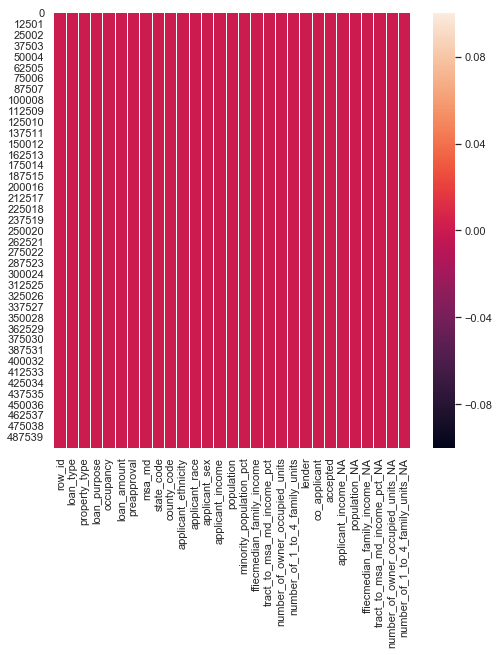

In [410]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.isnull())

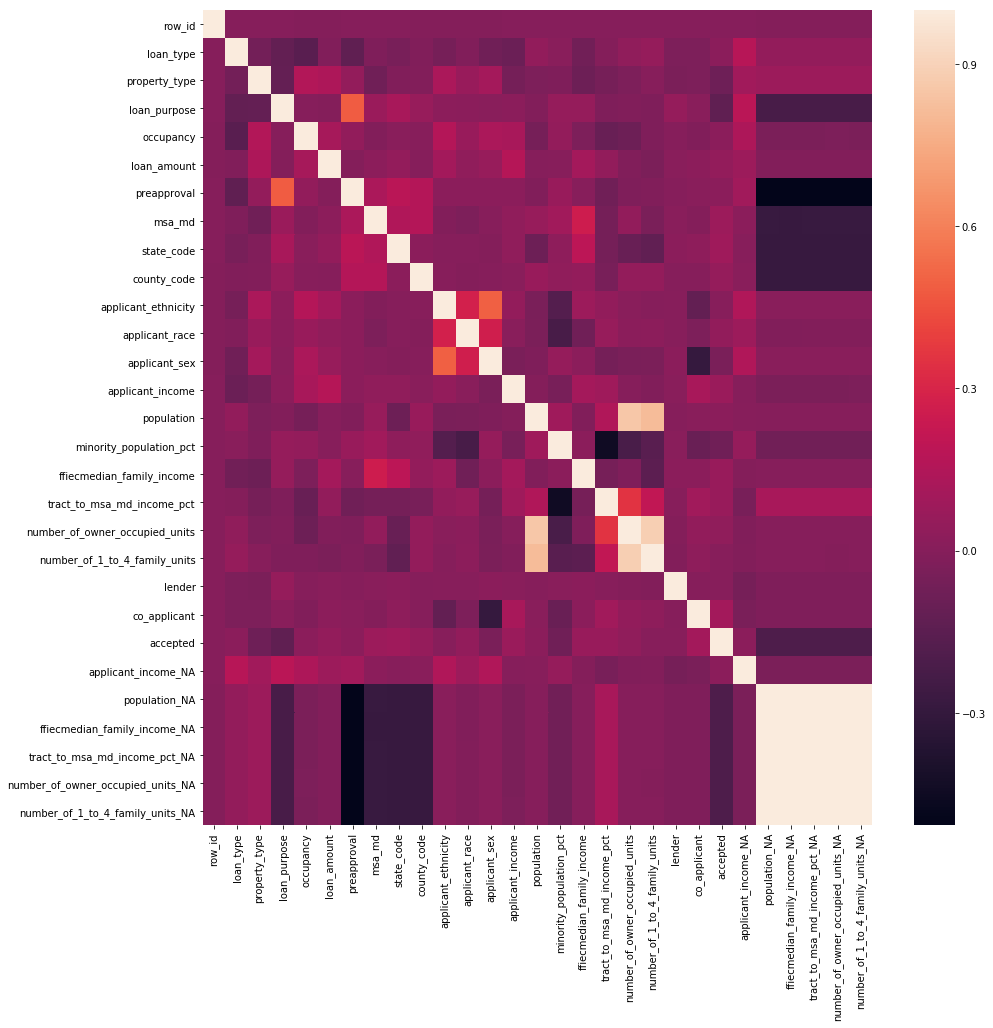

In [114]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr())

In [411]:
train_copy = train.copy()
test_copy = test.copy()

## 2.0 OUTLIERS

In [412]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0,0


## 2.0 loan amount 

Text(0.5, 0, 'loan_amount')

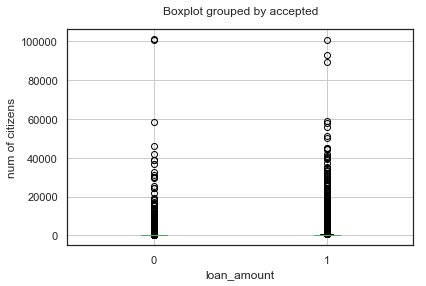

In [413]:
fig = train_copy.boxplot(column='loan_amount',by='accepted')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('loan_amount')

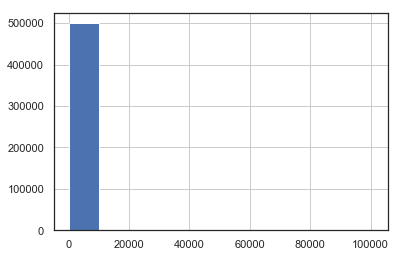

In [414]:
train_copy.loan_amount.hist()

In [415]:
# upper and lower boundaries for the outliers according to interquantile proximity rule

IQR = train_copy.loan_amount.quantile(0.75) - train_copy.loan_amount.quantile(0.25)

lower_fence = train_copy.loan_amount.quantile(0.25) - (IQR * 1.0)
Upper_fence = train_copy.loan_amount.quantile(0.75) + (IQR * 1.5)
lower_fence,Upper_fence

(-80.0, 525.5)

In [416]:
train_copy.loc[train_copy.loan_amount>Upper_fence,'loan_amount']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.loan_amount>Upper_fence,'loan_amount']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
train_copy.loc[train_copy.loan_amount<lower_fence,'loan_amount']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.loan_amount<lower_fence,'loan_amount']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)


Text(0.5, 0, 'loan_amount')

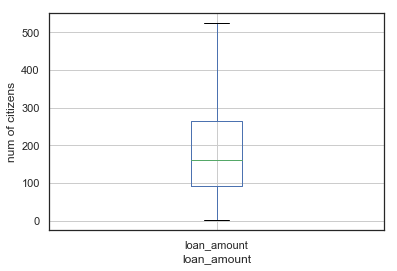

In [417]:
fig = train_copy.boxplot(column='loan_amount')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('loan_amount')

In [418]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0,0


## 2.1 msa_sd

Text(0.5, 0, 'msa_md')

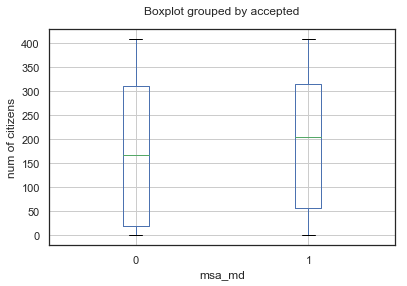

In [419]:
fig = train_copy.boxplot(column='msa_md',by='accepted')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('msa_md')

## 2.2 applicant_income

Text(0.5, 0, 'applicant_income')

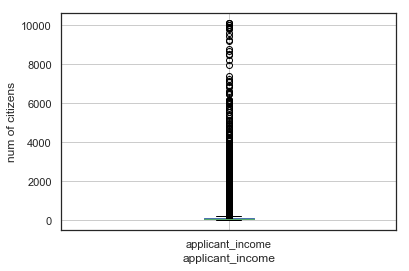

In [420]:
fig = train_copy.boxplot(column='applicant_income')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('applicant_income')

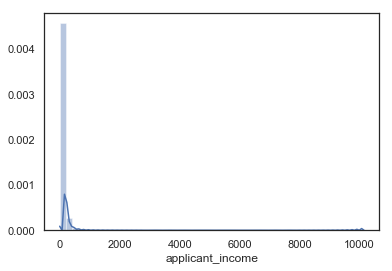

In [421]:
sns.distplot(train_copy.applicant_income)

In [422]:
train_copy.applicant_income.describe()

count    500000.000000
mean        102.389521
std         147.273425
min           1.000000
25%          49.000000
50%          79.000000
75%         112.000000
max       10139.000000
Name: applicant_income, dtype: float64

In [423]:
upper_b = train_copy.applicant_income.mean() + 3*train_copy.applicant_income.std()
upper_b

544.2097973995878

In [424]:
train_copy.loc[train_copy.applicant_income>upper_b,'applicant_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.applicant_income>upper_b,'applicant_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)

In [425]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

In [426]:
#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [227]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6987592420538722
Logistic Reg accuracy: 0.6458865671641791
Test set mean imputation
Logistic Reg roc_auc: 0.6963192410552609
Logistic Reg accuracy: 0.6440424242424242



In [427]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0,0


## 2.3 population

Text(0.5, 0, 'population')

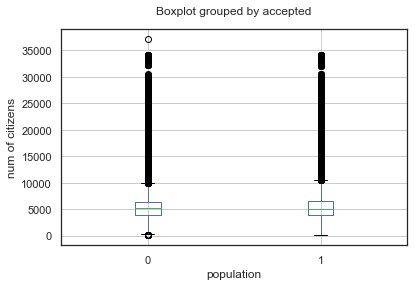

In [428]:
fig = train_copy.boxplot(column='population',by='accepted')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('population')

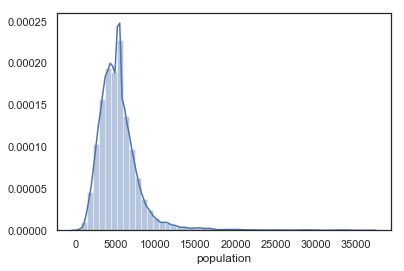

In [429]:
sns.distplot(train_copy.population)

# 2.4 minority_population_pct

Text(0.5, 0, 'minority_population_pct')

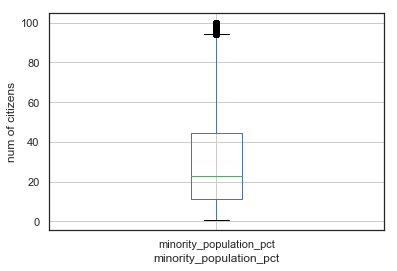

In [430]:
fig = train_copy.boxplot(column='minority_population_pct')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('minority_population_pct')

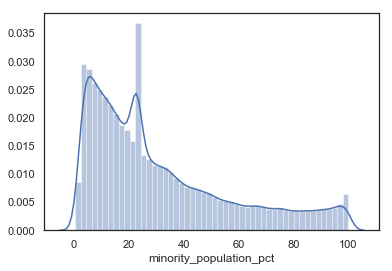

In [431]:
sns.distplot(train_copy.minority_population_pct)

In [432]:
# upper and lower boundaries for the outliers according to interquantile proximity rule

IQR = train_copy.minority_population_pct.quantile(0.75) - train_copy.minority_population_pct.quantile(0.25)

lower_fence = train_copy.minority_population_pct.quantile(0.25) - (IQR * 1.5)
Upper_fence = train_copy.minority_population_pct.quantile(0.75) + (IQR * 1.5)
lower_fence,Upper_fence

(-38.75150000000001, 94.42850000000001)

In [433]:
train_copy.loc[train_copy.minority_population_pct>Upper_fence,'minority_population_pct']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.minority_population_pct>Upper_fence,'minority_population_pct']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
train_copy.loc[train_copy.minority_population_pct<lower_fence,'minority_population_pct']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.minority_population_pct<lower_fence,'minority_population_pct']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)


In [434]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [117]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6987344940506515
Logistic Reg accuracy: 0.6458447761194029
Test set mean imputation
Logistic Reg roc_auc: 0.6962991447905384
Logistic Reg accuracy: 0.6441757575757576



In [435]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.2300,60588.0,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.9050,54821.0,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.2700,67719.0,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.2460,78439.0,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,94.4285,63075.0,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0,0


## 2.5 ffiecmedian_family_income

Text(0.5, 0, 'ffiecmedian_family_income')

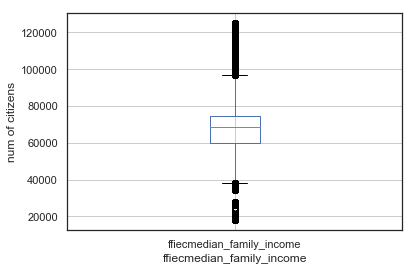

In [436]:
fig = train_copy.boxplot(column='ffiecmedian_family_income')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('ffiecmedian_family_income')

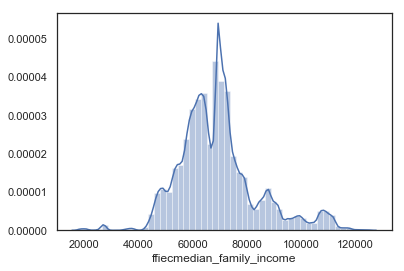

In [437]:
sns.distplot(train_copy.ffiecmedian_family_income)

In [438]:
upper_b = train_copy.ffiecmedian_family_income.mean() + 3*train_copy.applicant_income.std()
lower_b = train_copy.ffiecmedian_family_income.mean() - 3*train_copy.applicant_income.std()

upper_b,lower_b

(69477.20669854624, 68993.9998974954)

In [439]:
train_copy.loc[train_copy.ffiecmedian_family_income>upper_b,'ffiecmedian_family_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.ffiecmedian_family_income>upper_b,'ffiecmedian_family_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
train_copy.loc[train_copy.ffiecmedian_family_income<lower_b,'ffiecmedian_family_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.ffiecmedian_family_income<lower_b,'ffiecmedian_family_income']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)

In [440]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [441]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6984463666434737
Logistic Reg accuracy: 0.6454298507462687
Test set mean imputation
Logistic Reg roc_auc: 0.6960551022212018
Logistic Reg accuracy: 0.6443878787878788



In [442]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0,0


## 2.6 tract_to_msa_md_income_pct

Text(0.5, 0, 'tract_to_msa_md_income_pct')

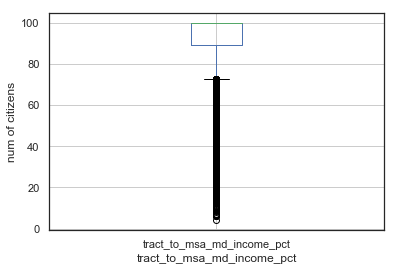

In [443]:
fig = train_copy.boxplot(column='tract_to_msa_md_income_pct')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('tract_to_msa_md_income_pct')

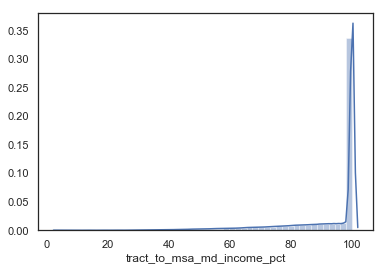

In [444]:
sns.distplot(train_copy.tract_to_msa_md_income_pct)

## 2.7 	number_of_owner_occupied_units

In [445]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0,0


Text(0.5, 0, 'number_of_owner_occupied_units')

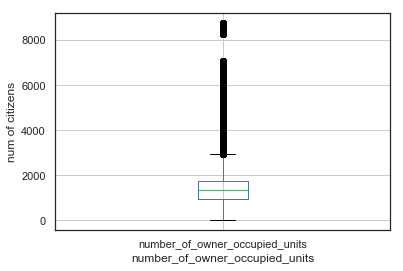

In [446]:
fig = train_copy.boxplot(column='number_of_owner_occupied_units')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('number_of_owner_occupied_units')

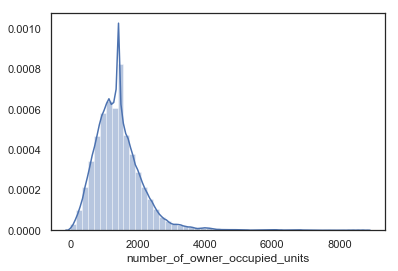

In [447]:
sns.distplot(train_copy.number_of_owner_occupied_units)

In [448]:
upper_b = train_copy.number_of_owner_occupied_units.mean() + 3*train_copy.number_of_owner_occupied_units.std()
lower_b = train_copy.number_of_owner_occupied_units.mean() - 3*train_copy.number_of_owner_occupied_units.std()

upper_b,lower_b

(3589.891216229807, -734.4546520902436)

In [449]:
train_copy.loc[train_copy.number_of_owner_occupied_units>upper_b,'number_of_owner_occupied_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.number_of_owner_occupied_units>upper_b,'number_of_owner_occupied_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
train_copy.loc[train_copy.number_of_owner_occupied_units<lower_b,'number_of_owner_occupied_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.number_of_owner_occupied_units<lower_b,'number_of_owner_occupied_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)

In [450]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [134]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6984452751201446
Logistic Reg accuracy: 0.6454238805970149
Test set mean imputation
Logistic Reg roc_auc: 0.6960585329467663
Logistic Reg accuracy: 0.644430303030303



In [451]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0,0


## 2.8 number_of_1_to_4_family_units

Text(0.5, 0, 'number_of_1_to_4_family_units')

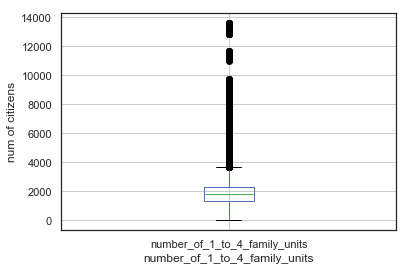

In [452]:
fig = train_copy.boxplot(column='number_of_1_to_4_family_units')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('number_of_1_to_4_family_units')

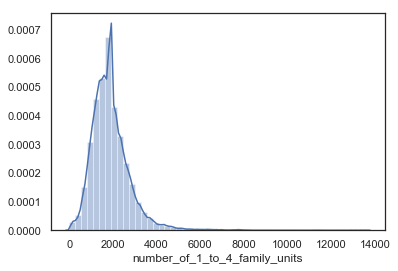

In [453]:
sns.distplot(train_copy.number_of_1_to_4_family_units)

In [454]:
upper_b = train_copy.number_of_1_to_4_family_units.mean() + 2.3*train_copy.number_of_1_to_4_family_units.std()
lower_b = train_copy.number_of_1_to_4_family_units.mean() - 3*train_copy.number_of_1_to_4_family_units.std()

upper_b,lower_b

(3940.716618124381, -793.7262657700778)

In [455]:
train_copy.loc[train_copy.number_of_1_to_4_family_units>upper_b,'number_of_1_to_4_family_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.number_of_1_to_4_family_units>upper_b,'number_of_1_to_4_family_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
train_copy.loc[train_copy.number_of_1_to_4_family_units<lower_b,'number_of_1_to_4_family_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.number_of_1_to_4_family_units<lower_b,'number_of_1_to_4_family_units']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)

In [456]:
X_train, X_test, y_train, y_test = train_test_split(train_copy, train_copy.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [141]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.6982315254185538
Logistic Reg accuracy: 0.645223880597015
Test set mean imputation
Logistic Reg roc_auc: 0.6958684631103306
Logistic Reg accuracy: 0.6444363636363636



In [457]:
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,False,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,False,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,False,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,True,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,False,1,0,0,0,0,0,0


## 2.9 lender

Text(0.5, 0, 'lender')

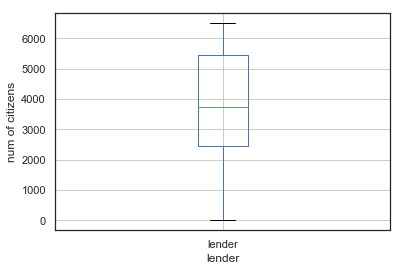

In [458]:
fig = train_copy.boxplot(column='lender')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('lender')

## 3.0 Categorical features

## 3.0 co_applicant

In [459]:
train_copy['co_applicant'] = np.where(train.co_applicant==True,1,0)
test_copy['co_applicant'] = np.where(test.co_applicant==True,1,0)
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0


In [460]:
categorical_col = ['loan_type','property_type','loan_purpose','occupancy','preapproval','applicant_ethnicity','applicant_race','applicant_sex']

In [461]:
df_cat_train = pd.DataFrame(data=train,columns=categorical_col)
df_cat_test = pd.DataFrame(data=test,columns=categorical_col)
df_cat_train.head()

,loan_type,property_type,loan_purpose,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex
0,3,1,1,1,3,2,5,1
1,1,1,3,1,3,1,5,1
2,2,1,3,1,3,2,5,1
3,1,1,1,1,1,2,5,1
4,1,1,1,1,3,2,3,2


## 3.1 loan_type

In [462]:
def freq_dist(df_categories):
    category_count = df_categories['loan_type'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of loan_type')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('loan_type',fontsize = 12)
    plt.show()

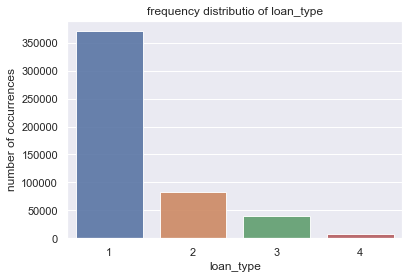

In [463]:
freq_dist(df_cat_train)

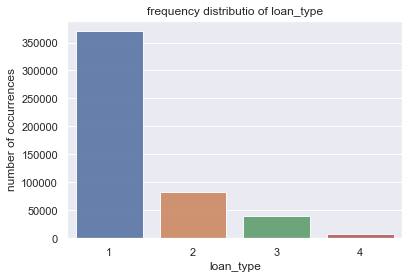

In [464]:
freq_dist(df_cat_test)

In [465]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['loan_type'],prefix='loan_type_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['loan_type'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['loan_type'],prefix='loan_type_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['loan_type'],inplace= True,axis=1)
df_cat_train.head()

,property_type,loan_purpose,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex,loan_type__1,loan_type__2,loan_type__3,loan_type__4
0,1,1,1,3,2,5,1,0,0,1,0
1,1,3,1,3,1,5,1,1,0,0,0
2,1,3,1,3,2,5,1,0,1,0,0
3,1,1,1,1,2,5,1,1,0,0,0
4,1,1,1,3,2,3,2,1,0,0,0


In [466]:
cols = ['loan_type__1','loan_type__2','loan_type__3','loan_type__4']
col = 'loan_type'

In [467]:
def categorical_func(train_df,test_df,df_new_cat_train,df_new_cat_test,col,cols):
    train_copy = pd.concat([train_df,df_new_cat_train[cols]],axis=1)
    train_copy.drop(columns=[col],inplace=True)
    test_copy = pd.concat([test_df,df_new_cat_test[cols]],axis=1)
    test_copy.drop(columns=[col],inplace=True)
    return train_copy,test_copy

In [468]:
new_train , new_test = categorical_func(train_copy,test_copy,df_cat_train,df_cat_test,col,cols)
new_train.head()

,row_id,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,loan_type__1,loan_type__2,loan_type__3,loan_type__4
0,0,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,0,0,0
2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,0,1,0,0
3,3,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,0,0,0
4,4,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,1,0,0,0


In [469]:
X_train, X_test, y_train, y_test = train_test_split(new_train, new_train.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [150]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.69836157395048
Logistic Reg accuracy: 0.6452358208955223
Test set mean imputation
Logistic Reg roc_auc: 0.6959465780133016
Logistic Reg accuracy: 0.6446969696969697



In [470]:
df_cat_train.head()

,property_type,loan_purpose,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex,loan_type__1,loan_type__2,loan_type__3,loan_type__4
0,1,1,1,3,2,5,1,0,0,1,0
1,1,3,1,3,1,5,1,1,0,0,0
2,1,3,1,3,2,5,1,0,1,0,0
3,1,1,1,1,2,5,1,1,0,0,0
4,1,1,1,3,2,3,2,1,0,0,0


In [471]:
def freq_dist(df_categories):
    category_count = df_categories['property_type'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of property_type')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('property_type',fontsize = 12)
    plt.show()

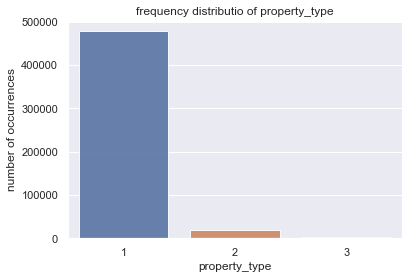

In [472]:
freq_dist(df_cat_train)

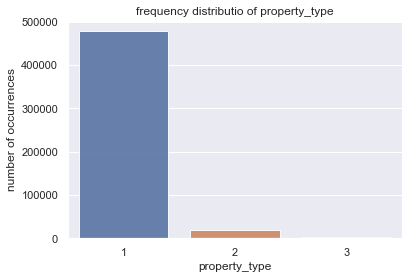

In [473]:
freq_dist(df_cat_test)

In [474]:
def freq_dist(df_categories):
    category_count = df_categories['loan_purpose'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of loan_purpose')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('loan_purpose',fontsize = 12)
    plt.show()

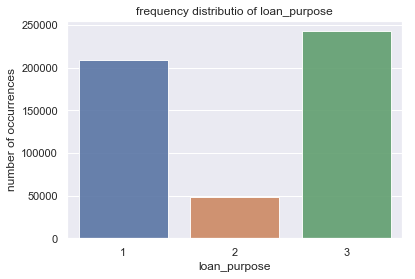

In [475]:
freq_dist(df_cat_train)

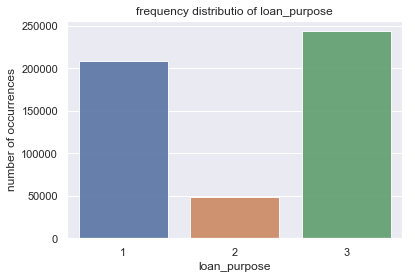

In [476]:
freq_dist(df_cat_test)

In [477]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['loan_purpose'],prefix='loan_purpose_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['loan_purpose'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['loan_purpose'],prefix='loan_purpose_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['loan_purpose'],inplace= True,axis=1)
df_cat_train.head()

,property_type,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3
0,1,1,3,2,5,1,0,0,1,0,1,0,0
1,1,1,3,1,5,1,1,0,0,0,0,0,1
2,1,1,3,2,5,1,0,1,0,0,0,0,1
3,1,1,1,2,5,1,1,0,0,0,1,0,0
4,1,1,3,2,3,2,1,0,0,0,1,0,0


In [478]:
cols = ['loan_purpose__1','loan_purpose__2','loan_purpose__3']
col = 'loan_purpose'

In [479]:
new_train , new_test = categorical_func(train_copy,test_copy,df_cat_train,df_cat_test,col,cols)
new_train.head()

,row_id,loan_type,property_type,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,loan_purpose__1,loan_purpose__2,loan_purpose__3
0,0,3,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0
1,1,1,1,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,0,0,1
2,2,2,1,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,0,0,1
3,3,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,0,0
4,4,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,1,0,0


In [480]:
X_train, X_test, y_train, y_test = train_test_split(new_train, new_train.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [481]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set mean imputation')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set mean imputation')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set mean imputation
Logistic Reg roc-auc: 0.7049185416407827
Logistic Reg accuracy: 0.6492268656716418
Test set mean imputation
Logistic Reg roc_auc: 0.7036968662233036
Logistic Reg accuracy: 0.6489515151515152



In [482]:
def freq_dist(df_categories):
    category_count = df_categories['property_type'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of property_type')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('property_type',fontsize = 12)
    plt.show()

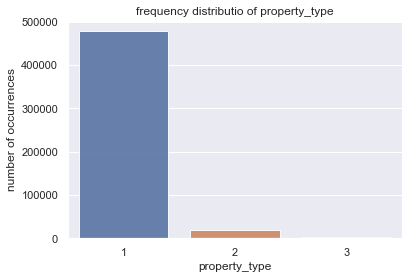

In [483]:
freq_dist(df_cat_train)

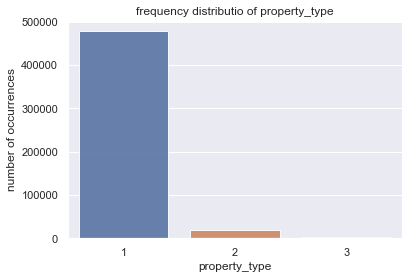

In [484]:
freq_dist(df_cat_train)

In [485]:
binary_col = ['property_type']

In [486]:
df_cat_train.head()

,property_type,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3
0,1,1,3,2,5,1,0,0,1,0,1,0,0
1,1,1,3,1,5,1,1,0,0,0,0,0,1
2,1,1,3,2,5,1,0,1,0,0,0,0,1
3,1,1,1,2,5,1,1,0,0,0,1,0,0
4,1,1,3,2,3,2,1,0,0,0,1,0,0


In [487]:
def freq_dist(df_categories):
    category_count = df_categories['occupancy'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of occupancy')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('occupancy',fontsize = 12)
    plt.show()

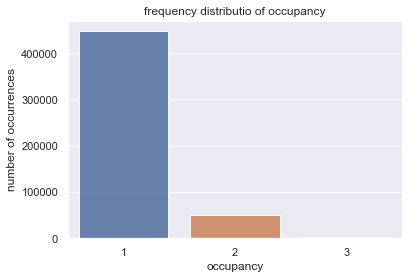

In [488]:
freq_dist(df_cat_train)

In [489]:
binary_col.append('occupancy')
binary_col

['property_type', 'occupancy']

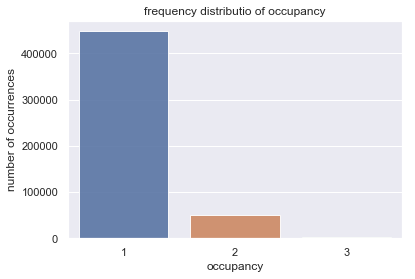

In [490]:
freq_dist(df_cat_test)

In [491]:
df_cat_train.head()

,property_type,occupancy,preapproval,applicant_ethnicity,applicant_race,applicant_sex,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3
0,1,1,3,2,5,1,0,0,1,0,1,0,0
1,1,1,3,1,5,1,1,0,0,0,0,0,1
2,1,1,3,2,5,1,0,1,0,0,0,0,1
3,1,1,1,2,5,1,1,0,0,0,1,0,0
4,1,1,3,2,3,2,1,0,0,0,1,0,0


In [492]:
def freq_dist(df_categories):
    category_count = df_categories['preapproval'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of preapproval')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('preapproval',fontsize = 12)
    plt.show()

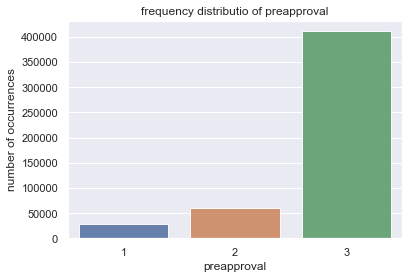

In [493]:
freq_dist(df_cat_train)

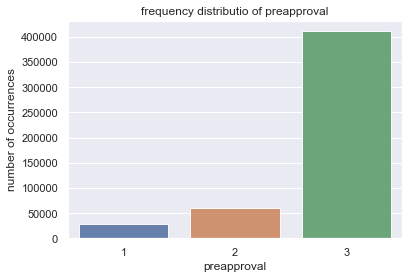

In [494]:
freq_dist(df_cat_test)

In [495]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['preapproval'],prefix='preapproval_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['preapproval'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['preapproval'],prefix='preapproval_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['preapproval'],inplace= True,axis=1)
df_cat_train.head()

,property_type,occupancy,applicant_ethnicity,applicant_race,applicant_sex,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3
0,1,1,2,5,1,0,0,1,0,1,0,0,0,0,1
1,1,1,1,5,1,1,0,0,0,0,0,1,0,0,1
2,1,1,2,5,1,0,1,0,0,0,0,1,0,0,1
3,1,1,2,5,1,1,0,0,0,1,0,0,1,0,0
4,1,1,2,3,2,1,0,0,0,1,0,0,0,0,1


In [496]:
def freq_dist(df_categories):
    category_count = df_categories['applicant_ethnicity'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of applicant_ethnicity')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('applicant_ethnicity',fontsize = 12)
    plt.show()

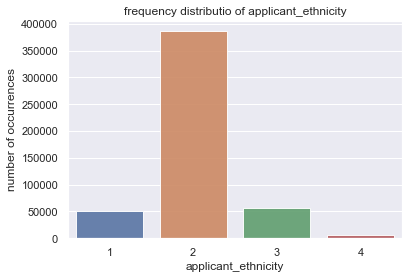

In [497]:
freq_dist(df_cat_train)

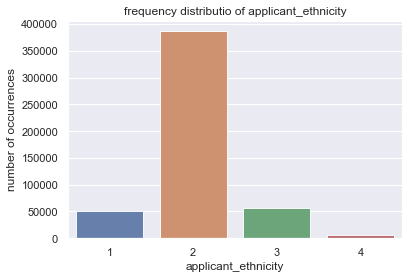

In [498]:
freq_dist(df_cat_test)

In [499]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['applicant_ethnicity'],prefix='applicant_ethnicity_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['applicant_ethnicity'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['applicant_ethnicity'],prefix='applicant_ethnicity_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['applicant_ethnicity'],inplace= True,axis=1)
df_cat_train.head()

,property_type,occupancy,applicant_race,applicant_sex,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,1,1,5,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,1,1,5,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0
2,1,1,5,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,1,1,5,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,1,1,3,2,1,0,0,0,1,0,0,0,0,1,0,1,0,0


In [500]:
def freq_dist(df_categories):
    category_count = df_categories['applicant_race'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of applicant_race')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('applicant_race',fontsize = 12)
    plt.show()

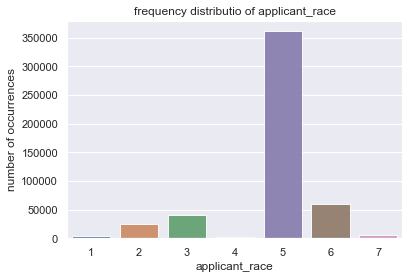

In [501]:
freq_dist(df_cat_train)

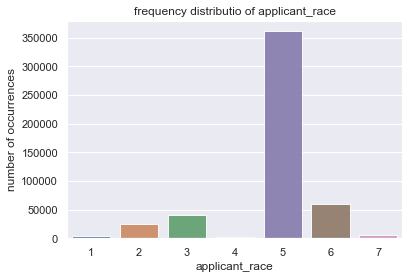

In [502]:
freq_dist(df_cat_test)

In [503]:
#since both have approximate distribution and a spike of one label while the rest are level, i will give priority to the highly occurred label
df_cat_test['applicant_race'] = np.where(df_cat_test['applicant_race']==5, 1, 0)
df_cat_train['applicant_race'] = np.where(df_cat_train['applicant_race']==5, 1, 0)
df_cat_train.head()

,property_type,occupancy,applicant_race,applicant_sex,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,1,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0
2,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,1,1,0,2,1,0,0,0,1,0,0,0,0,1,0,1,0,0


In [504]:
binary_col.append('applicant_sex')
binary_col

['property_type', 'occupancy', 'applicant_sex']

In [505]:
df_cat_train.drop(columns=binary_col,axis= 1,inplace= True)
df_cat_test.drop(columns=binary_col,axis= 1,inplace= True)
df_cat_train.head()

,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0
2,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0


In [506]:
train_copy.drop(columns=['applicant_race'],axis= 1,inplace= True)
test_copy.drop(columns=['applicant_race'],axis= 1,inplace= True)
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0


In [507]:
train_copy = pd.concat([train_copy,df_cat_train],axis=1)
test_copy = pd.concat([test_copy,df_cat_test],axis=1)
train_copy.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0


In [508]:
len(train_copy),len(test_copy)

(500000, 500000)

In [509]:
np.shape(train_copy),np.shape(test_copy)

((500000, 43), (500000, 42))

## dont touch the next cell if not necessary

In [510]:
#reserving copied version of train and set up to this stage 
train_copy1 = train_copy.copy()
test_copy1 = test_copy.copy()
train_copy1.to_csv('train_copy1.csv',index = False)
test_copy1.to_csv('test_copy1.csv',index = False)

## Analysis

In [79]:
train_copy1 = pd.read_csv("train_copy1.csv")
test_copy1 = pd.read_csv("test_copy1.csv")

In [80]:
np.shape(train_copy1),np.shape(test_copy1)

((500000, 43), (500000, 42))

In [81]:
new_train = train_copy1
new_test = test_copy1

In [82]:
new_train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0


## feature engineering with additional features
## 1.0 Loan acceptance rates across ethnicity and gender

In [83]:
training = new_train.copy()
testing = new_test.copy()

In [84]:
training['lender_enc'] = np.zeros(len(training))
testing['lender_enc'] = np.zeros(len(testing))
lender_groups = training.groupby(by = 'lender')

In [85]:
training.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.0
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.0
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.0
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.0
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0.0


In [86]:
len(list(lender_groups.groups))

6111

In [87]:
def target_encoder(group_no):
    group = lender_groups.get_group(group_no)
    enc_prob = len(group[group.accepted==1])/len(group)
    training.loc[training.lender==group_no,'lender_enc'] = enc_prob
    testing.loc[testing.lender==group_no,'lender_enc'] = enc_prob
    

In [88]:
for i in list(lender_groups.groups):
    target_encoder(i)
print('done!!!!!!')

done!!!!!!


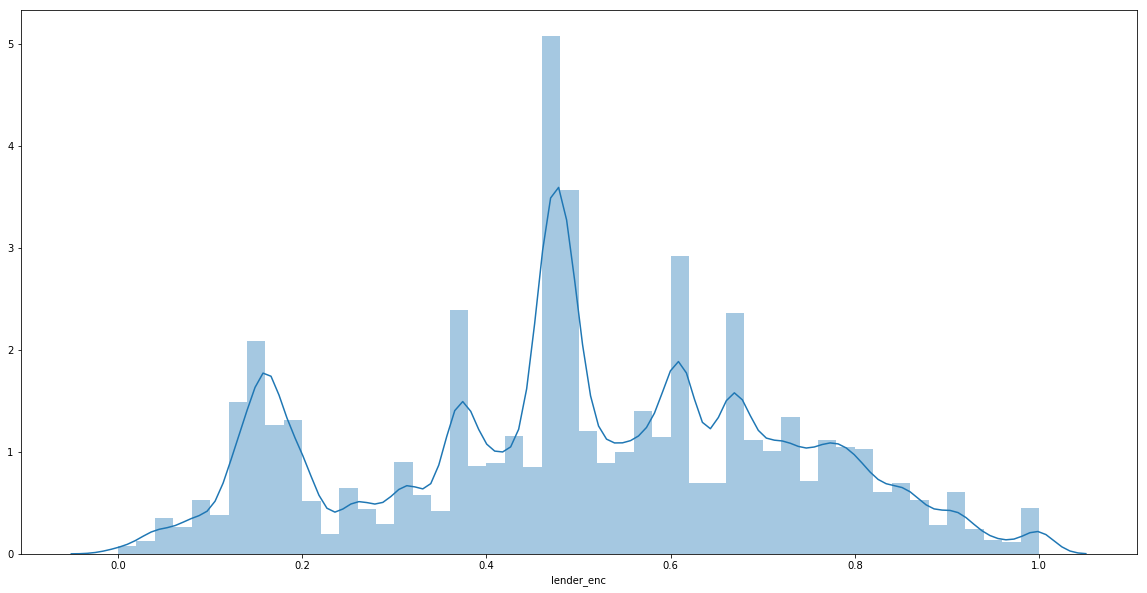

In [89]:
plt.figure(figsize=(20, 10))
sns.distplot(training.lender_enc)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols




In [92]:
# base model
logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7878896687524746
Logistic Reg accuracy: 0.7106656716417911
Test set 
Logistic Reg roc_auc: 0.7872113872788689
Logistic Reg accuracy: 0.7097696969696969



In [93]:
training.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.489632
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.691964
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0.542994


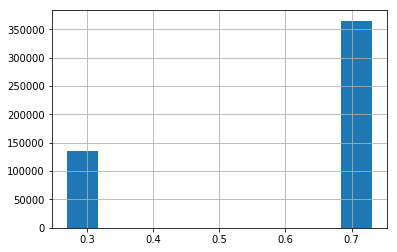

In [94]:
training["twice_income"] = np.zeros(len(training))
testing["twice_income"] = np.zeros(len(training))
twice_inc_percent = len(training.loc[(training.loan_purpose==1) & (training.loan_amount >= 2*training.applicant_income) ])/len(training)
training.loc[(training.loan_purpose==1) & (training.loan_amount >= 2*training.applicant_income),'twice_income']=twice_inc_percent
testing.loc[(testing.loan_purpose==1) & (testing.loan_amount >= 2*testing.applicant_income),'twice_income']=twice_inc_percent
training.loc[(training.twice_income==0),'twice_income']= 1 - twice_inc_percent
testing.loc[(testing.twice_income==0),'twice_income']= 1 - twice_inc_percent

training.twice_income.hist()

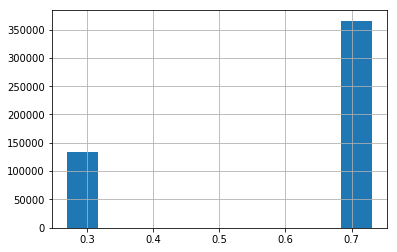

In [95]:
testing.twice_income.hist()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols




In [97]:
# base model
logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7880262528088471
Logistic Reg accuracy: 0.7109582089552239
Test set 
Logistic Reg roc_auc: 0.7872209718592319
Logistic Reg accuracy: 0.7093878787878788



In [98]:
low_income = np.round(training.applicant_income.max()/3).astype(np.int64)
mid_income = low_income *2
hig_income = mid_income+1
low_income,mid_income,hig_income

(181, 362, 363)

In [99]:
training['income_classes'] = np.zeros(len(training))
training.loc[training.applicant_income<=low_income,'income_classes'] = low_income
training.loc[(training.applicant_income >low_income) & (training.applicant_income < hig_income),'income_classes'] = mid_income
training.loc[(training.applicant_income >mid_income),'income_classes'] = hig_income

testing['income_classes'] = np.zeros(len(training))
testing.loc[testing.applicant_income<=low_income,'income_classes'] = low_income
testing.loc[(testing.applicant_income >low_income) & (training.applicant_income < hig_income),'income_classes'] = mid_income
testing.loc[(testing.applicant_income >mid_income),'income_classes'] = hig_income

#training.income_classes.fillna(2000)

In [100]:
training.income_classes.unique()

array([181., 362., 363.])

In [101]:
#((training.applicant_income >low_income) & (training.applicant_income < hig_income)).value_counts()

In [102]:
training['income_classes_enc'] = np.zeros(len(training))
testing['income_classes_enc'] = np.zeros(len(testing))
income_classes_groups = training.groupby(by = 'income_classes')

In [103]:
len(list(income_classes_groups.groups))

3

In [104]:
income_classes_groups.first()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes_enc
income_classes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
181.0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.230,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209,0.269726,0.0
362.0,8,1,1,3,2,209.0,3,24,37,20,2,1,244.0,5151.0,88.156,69477.206699,62.813,411.0,481.0,2118,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0.682927,0.730274,0.0
363.0,290,1,1,3,2,347.0,3,278,2,208,1,1,401.0,6902.0,93.517,69477.206699,100.000,1618.0,1781.0,5710,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.489632,0.730274,0.0


In [105]:
def target_encoder(group_no):
    group = income_classes_groups.get_group(group_no)
    enc_prob = len(group[group.accepted==1])/len(group)
    training.loc[training.income_classes==group_no,'income_classes_enc'] = enc_prob
    testing.loc[testing.income_classes==group_no,'income_classes_enc'] = enc_prob
    

In [106]:
for i in list(income_classes_groups.groups):
    target_encoder(i)
print('done!!!!!!')

done!!!!!!


In [107]:
testing.income_classes_enc.unique()

array([0.48893564, 0.610514  , 0.60422783, 0.        ])

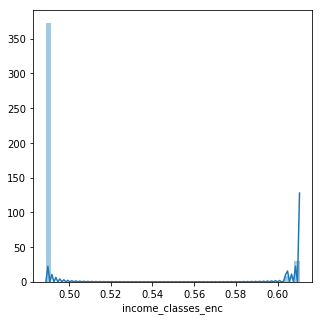

In [108]:
plt.figure(figsize=(5, 5))
sns.distplot(training.income_classes_enc)



In [109]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols




In [110]:
# base model
logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7896719889815742
Logistic Reg accuracy: 0.7118059701492537
Test set 
Logistic Reg roc_auc: 0.7892909552993724
Logistic Reg accuracy: 0.7113454545454545



In [111]:
len(training.number_of_1_to_4_family_units.unique())

3938

In [112]:
training['number_of_1_to_4_family_units_enc'] = np.zeros(len(training))
testing['number_of_1_to_4_family_units_enc'] = np.zeros(len(testing))
number_of_1_to_4_family_units_groups = training.groupby(by = 'number_of_1_to_4_family_units')

In [113]:
def target_encoder(group_no):
    group = number_of_1_to_4_family_units_groups.get_group(group_no)
    enc_prob = len(group[group.accepted==1])/len(group)
    training.loc[training.number_of_1_to_4_family_units==group_no,'number_of_1_to_4_family_units_enc'] = enc_prob
    testing.loc[testing.number_of_1_to_4_family_units==group_no,'number_of_1_to_4_family_units_enc'] = enc_prob
    

In [114]:
for i in list(number_of_1_to_4_family_units_groups.groups):
    target_encoder(i)
print('done!!!!!!')

done!!!!!!


In [115]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols


In [116]:
# base model
logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7927336810883959
Logistic Reg accuracy: 0.7147074626865672
Test set 
Logistic Reg roc_auc: 0.7926422108610857
Logistic Reg accuracy: 0.714260606060606



In [117]:
training.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209,0.269726,181.0,0.488936,0.639175
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919,0.730274,181.0,0.488936,0.570732
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.489632,0.730274,181.0,0.488936,0.500000
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.691964,0.730274,181.0,0.488936,0.534483
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0.542994,0.269726,181.0,0.488936,0.562016


In [118]:
training['county_code_enc'] = np.zeros(len(training))
testing['county_code_enc'] = np.zeros(len(testing))
county_code_groups = training.groupby(by = 'county_code')

In [119]:
len(county_code_groups.groups)

318

In [120]:
def target_encoder(group_no):
    group = county_code_groups.get_group(group_no)
    enc_prob = len(group[group.accepted==1])/len(group)
    training.loc[training.county_code==group_no,'county_code_enc'] = enc_prob
    testing.loc[testing.county_code==group_no,'county_code_enc'] = enc_prob
    

In [121]:
for i in list(county_code_groups.groups):
    target_encoder(i)
print('done!!!!!!')

done!!!!!!


In [122]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols


In [123]:
# base model
logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.793127397730489
Logistic Reg accuracy: 0.7151044776119403
Test set 
Logistic Reg roc_auc: 0.7931493737724209
Logistic Reg accuracy: 0.7150727272727273



In [124]:
training.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209,0.269726,181.0,0.488936,0.639175,0.499877
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919,0.730274,181.0,0.488936,0.570732,0.484798
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.489632,0.730274,181.0,0.488936,0.500000,0.506494
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.691964,0.730274,181.0,0.488936,0.534483,0.535882
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0.542994,0.269726,181.0,0.488936,0.562016,0.526313


In [125]:
training['applicant_sex_enc'] = np.zeros(len(training))
testing['applicant_sex_enc'] = np.zeros(len(testing))
applicant_sex_groups = training.groupby(by = 'applicant_sex')

In [126]:
def target_encoder(group_no):
    group = applicant_sex_groups.get_group(group_no)
    enc_prob = len(group[group.accepted==1])/len(group)
    training.loc[training.applicant_sex==group_no,'applicant_sex_enc'] = enc_prob
    testing.loc[testing.applicant_sex==group_no,'applicant_sex_enc'] = enc_prob

In [127]:
for i in list(applicant_sex_groups.groups):
    target_encoder(i)
print('done!!!!!!')

done!!!!!!


In [128]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols


In [129]:
# base model
logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7931576088036941
Logistic Reg accuracy: 0.7151462686567164
Test set 
Logistic Reg roc_auc: 0.7931579693928792
Logistic Reg accuracy: 0.7150363636363636



In [130]:
training.loc[training.msa_md==-1,'msa_md'] = training.msa_md.unique().max() + 1
testing.loc[testing.msa_md==-1,'msa_md'] = training.msa_md.unique().max() + 1

In [131]:
training['msa_md_enc'] = np.zeros(len(training))
testing['msa_md_enc'] = np.zeros(len(testing))
msa_md_groups = training.groupby(by = 'msa_md')
len(list(msa_md_groups.groups))

409

In [132]:
def target_encoder(group_no):
    group = msa_md_groups.get_group(group_no)
    enc_prob = len(group[group.accepted==1])/len(group)
    training.loc[training.msa_md==group_no,'msa_md_enc'] = enc_prob
    testing.loc[testing.msa_md==group_no,'msa_md_enc'] = enc_prob

In [133]:
for i in list(msa_md_groups.groups):
    target_encoder(i)
    #print(answer)
print('done!!!!!!')

done!!!!!!


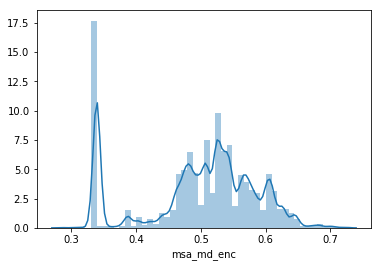

In [134]:
sns.distplot(training.msa_md_enc)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [136]:
# base model
logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.793808889700755
Logistic Reg accuracy: 0.715844776119403
Test set 
Logistic Reg roc_auc: 0.7937715466526242
Logistic Reg accuracy: 0.7157818181818182



In [137]:
#grouping by ethnicity
ethnicity_grouping = training.groupby(by='applicant_ethnicity')
ethnicity_grouping_test = testing.groupby(by='applicant_ethnicity')
ethnicity_grouping.first()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc,applicant_sex_enc,msa_md_enc
applicant_ethnicity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,3,1,178.0,3,369,52,299,1,57.000000,5774.0,15.905,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919,0.730274,181.0,0.488936,0.570732,0.484798,0.520823,0.543021
2,0,3,1,1,1,70.0,3,18,37,246,1,24.000000,6203.0,44.230,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209,0.269726,181.0,0.488936,0.639175,0.499877,0.520823,0.508505
3,10,1,1,1,1,319.0,3,358,32,244,3,78.000000,5931.0,39.082,69477.206699,100.000,1315.0,1382.0,838,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0.817518,0.269726,181.0,0.488936,0.536765,0.551784,0.406054,0.523775
4,68,1,3,1,3,233.0,3,308,47,7,4,102.389521,5198.0,39.447,69477.206699,97.373,1337.0,1791.0,4284,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0.666667,0.269726,181.0,0.488936,0.515267,0.502332,0.795947,0.589162


In [138]:
E1 = ethnicity_grouping.get_group(1)
E1t = ethnicity_grouping_test.get_group(1)
E2 = ethnicity_grouping.get_group(2)
E2t = ethnicity_grouping_test.get_group(2)
E3 = ethnicity_grouping.get_group(3)
E3t = ethnicity_grouping_test.get_group(3)
E4 = ethnicity_grouping.get_group(4)
E4t = ethnicity_grouping_test.get_group(4)


In [139]:
# rate of acceptance per ethnicity 
acceptance_rate_E1 = len(E1[E1.accepted==1])/len(E1)
acceptance_rate_E2 = len(E2[E2.accepted==1])/len(E2)
acceptance_rate_E3 = len(E3[E3.accepted==1])/len(E3)
acceptance_rate_E4 = len(E4[E4.accepted==1])/len(E4)
acceptance_rate_E1,acceptance_rate_E2,acceptance_rate_E3,acceptance_rate_E4

(0.427413324938019, 0.520518778120556, 0.398739921114175, 0.789310878157759)

In [140]:
training['acceptance_rate'] = np.zeros(len(training))
E1['acceptance_rate'] = (E1.lender - (E1.loan_amount / np.power((1+acceptance_rate_E1),len(E1)))) *   (acceptance_rate_E1 / (1 - np.power((1 + acceptance_rate_E1),-len(E1))))
E2['acceptance_rate'] = (E2.lender - (E2.loan_amount / np.power((1+acceptance_rate_E2),len(E2)))) *   (acceptance_rate_E2 / (1 - np.power((1 + acceptance_rate_E2),-len(E2))))
E3['acceptance_rate'] = (E3.lender - (E3.loan_amount / np.power((1+acceptance_rate_E3),len(E3)))) *   (acceptance_rate_E3 / (1 - np.power((1 + acceptance_rate_E3),-len(E3))))
E4['acceptance_rate'] = (E4.lender - (E4.loan_amount / np.power((1+acceptance_rate_E4),len(E4)))) *   (acceptance_rate_E4 / (1 - np.power((1 + acceptance_rate_E4),-len(E4))))

testing['acceptance_rate'] = np.zeros(len(testing))
E1t['acceptance_rate'] = (E1t.lender - (E1t.loan_amount / np.power((1+acceptance_rate_E1),len(E1)))) *   (acceptance_rate_E1 / (1 - np.power((1 + acceptance_rate_E1),-len(E1))))
E2t['acceptance_rate'] = (E2t.lender - (E2t.loan_amount / np.power((1+acceptance_rate_E2),len(E2)))) *   (acceptance_rate_E2 / (1 - np.power((1 + acceptance_rate_E2),-len(E2))))
E3t['acceptance_rate'] = (E3t.lender - (E3t.loan_amount / np.power((1+acceptance_rate_E3),len(E3)))) *   (acceptance_rate_E3 / (1 - np.power((1 + acceptance_rate_E3),-len(E3))))
E4t['acceptance_rate'] = (E4t.lender - (E4t.loan_amount / np.power((1+acceptance_rate_E4),len(E4)))) *   (acceptance_rate_E4 / (1 - np.power((1 + acceptance_rate_E4),-len(E4))))

In [141]:
training.loc[training.applicant_ethnicity==1,'acceptance_rate'] = E1.acceptance_rate  
training.loc[training.applicant_ethnicity==2,'acceptance_rate'] = E2.acceptance_rate   
training.loc[training.applicant_ethnicity==3,'acceptance_rate'] = E3.acceptance_rate   
training.loc[training.applicant_ethnicity==4,'acceptance_rate'] = E4.acceptance_rate   
training.acceptance_rate = training.acceptance_rate * training.lender * np.log(training.lender + 1)

testing.loc[testing.applicant_ethnicity==1,'acceptance_rate'] = E1t.acceptance_rate  
testing.loc[testing.applicant_ethnicity==2,'acceptance_rate'] = E2t.acceptance_rate   
testing.loc[testing.applicant_ethnicity==3,'acceptance_rate'] = E3t.acceptance_rate   
testing.loc[testing.applicant_ethnicity==4,'acceptance_rate'] = E4t.acceptance_rate   
testing.acceptance_rate = testing.acceptance_rate * testing.lender * np.log(testing.lender + 1)

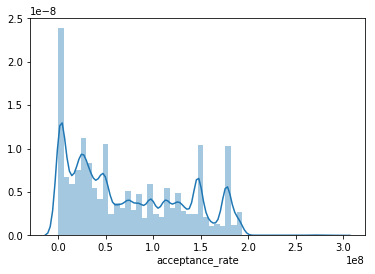

In [142]:
sns.distplot(training.acceptance_rate)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [144]:
# base model
logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7938146884897257
Logistic Reg accuracy: 0.7158029850746269
Test set 
Logistic Reg roc_auc: 0.7937792200176491
Logistic Reg accuracy: 0.7159878787878788



In [145]:
#Loan deviation calculation
training[training.applicant_ethnicity==1].head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc,applicant_sex_enc,msa_md_enc,acceptance_rate
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.000000,5774.0,15.905,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919,0.730274,181.0,0.488936,0.570732,0.484798,0.520823,0.543021,2.016157e+07
6,6,3,1,1,1,240.0,3,374,28,131,1,2,104.000000,6068.0,26.427,69477.206699,81.068,1863.0,2560.0,5488,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0.560582,0.269726,181.0,0.488936,0.551724,0.561803,0.466453,0.572293,1.108421e+08
7,7,2,1,1,1,210.0,3,322,37,35,1,1,55.000000,6030.0,78.153,69477.206699,59.439,969.0,1601.0,2442,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0.720670,0.269726,181.0,0.488936,0.548951,0.507103,0.520823,0.605190,1.988331e+07
12,12,2,1,3,1,138.0,3,61,28,3,1,2,102.389521,9958.0,41.404,69477.206699,100.000,2220.0,2727.0,4664,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0.969957,0.730274,181.0,0.488936,0.596491,0.545274,0.466453,0.568385,7.854363e+07
16,16,1,1,3,2,177.0,3,333,6,80,1,2,102.389521,6420.0,29.818,69477.206699,100.000,1553.0,2001.0,3354,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.158533,0.730274,181.0,0.488936,0.504098,0.511585,0.466453,0.483990,3.903321e+07


In [146]:
E1 = list(np.absolute(E1.loan_amount.mean()-E1.loan_amount))
E2 = list(np.absolute(E2.loan_amount.mean()-E2.loan_amount))
E3 = list(np.absolute(E3.loan_amount.mean()-E3.loan_amount))
E4 = list(np.absolute(E4.loan_amount.mean()-E4.loan_amount))
E1t = list(np.absolute(E1t.loan_amount.mean()-E1t.loan_amount))
E2t = list(np.absolute(E2t.loan_amount.mean()-E2t.loan_amount))
E3t = list(np.absolute(E3t.loan_amount.mean()-E3t.loan_amount))
E4t = list(np.absolute(E4t.loan_amount.mean()-E4t.loan_amount))

In [147]:
training['Ethnicity_Loan_dev'] = np.zeros(len(training))
testing['Ethnicity_Loan_dev'] = np.zeros(len(testing))
training.head(2)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc,applicant_sex_enc,msa_md_enc,acceptance_rate,Ethnicity_Loan_dev
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.230,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209,0.269726,181.0,0.488936,0.639175,0.499877,0.520823,0.508505,9.017698e+07,0.0
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.905,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919,0.730274,181.0,0.488936,0.570732,0.484798,0.520823,0.543021,2.016157e+07,0.0


In [148]:
training.loc[training.applicant_ethnicity==1,'Ethnicity_Loan_dev'] = E1  
training.loc[training.applicant_ethnicity==2,'Ethnicity_Loan_dev'] = E2  
training.loc[training.applicant_ethnicity==3,'Ethnicity_Loan_dev'] = E3  
training.loc[training.applicant_ethnicity==4,'Ethnicity_Loan_dev'] = E4  

testing.loc[testing.applicant_ethnicity==1,'Ethnicity_Loan_dev'] = E1t  
testing.loc[testing.applicant_ethnicity==2,'Ethnicity_Loan_dev'] = E2t  
testing.loc[testing.applicant_ethnicity==3,'Ethnicity_Loan_dev'] = E3t  
testing.loc[testing.applicant_ethnicity==4,'Ethnicity_Loan_dev'] = E4t  

In [149]:
training[training.applicant_ethnicity==4]['Ethnicity_Loan_dev'].head()


68      31.961162
145    260.538838
587    224.961162
597    210.961162
648     12.961162
Name: Ethnicity_Loan_dev, dtype: float64

In [150]:
training.head()


,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc,applicant_sex_enc,msa_md_enc,acceptance_rate,Ethnicity_Loan_dev
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209,0.269726,181.0,0.488936,0.639175,0.499877,0.520823,0.508505,9.017698e+07,125.276816
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919,0.730274,181.0,0.488936,0.570732,0.484798,0.520823,0.543021,2.016157e+07,4.855860
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.489632,0.730274,181.0,0.488936,0.500000,0.506494,0.520823,0.508886,1.468021e+08,32.276816
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.691964,0.730274,181.0,0.488936,0.534483,0.535882,0.520823,0.544391,1.566512e+08,40.276816
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0.542994,0.269726,181.0,0.488936,0.562016,0.526313,0.466453,0.524821,2.464938e+05,109.723184


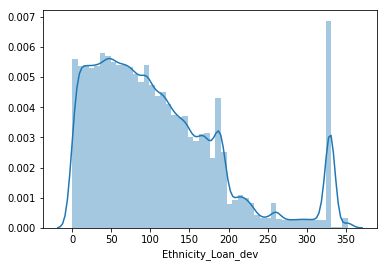

In [151]:
sns.distplot(training.Ethnicity_Loan_dev)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols




In [153]:
# base model
logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7947038157561321
Logistic Reg accuracy: 0.716489552238806
Test set 
Logistic Reg roc_auc: 0.7947342889084926
Logistic Reg accuracy: 0.7167151515151515



## binarizing some continous features features

In [154]:
#training['Ethnicity_Loan_dev_normalized'] = pd.DataFrame(normalize(training.lender.values.reshape(-1, 1),norm = 'max'),columns=['Ethnicity_Loan_dev_normalized'])
#training.drop(columns=['sex_bin'],axis=1,inplace=True)
from sklearn.preprocessing import Binarizer
banirizer = Binarizer(threshold = training.lender.mean())
banirizer


Binarizer(copy=True, threshold=3720.121344)

In [155]:
training['lender_bin'] =  banirizer.fit_transform(training.lender.values.reshape(-1, 1))
testing['lender_bin'] =  banirizer.transform(testing.lender.values.reshape(-1, 1))
training['lender_bin'].tail()

499995    0
499996    1
499997    0
499998    1
499999    1
Name: lender_bin, dtype: int64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols




In [157]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7947142102846049
Logistic Reg accuracy: 0.7164179104477612
Test set 
Logistic Reg roc_auc: 0.7947488949838286
Logistic Reg accuracy: 0.7165818181818182



## 1.1 population to get sample size using slovin's formula

In [158]:
e = 7.839056099
training['pop_size'] = training.population / (1 + (training.population * e ))
testing['pop_size'] = testing.population / (1 + (testing.population * e ))
training['pop_size'].tail()

499995    0.127563
499996    0.127562
499997    0.127561
499998    0.127562
499999    0.127562
Name: pop_size, dtype: float64

In [159]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols



In [160]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set 
Logistic Reg roc-auc: 0.7947209731741022
Logistic Reg accuracy: 0.7164567164179104
Test set 
Logistic Reg roc_auc: 0.7947571376876786
Logistic Reg accuracy: 0.7165939393939393



In [161]:
## 1.1.2 applicant income loan ratio 
training['income_loan_ratio'] = training.loan_amount / (training.applicant_income + 1) 
testing['income_loan_ratio'] = testing.loan_amount / (testing.applicant_income + 1) 
training['income_loan_ratio'].tail()

499995    1.704545
499996    0.645161
499997    0.611111
499998    0.833333
499999    0.825581
Name: income_loan_ratio, dtype: float64

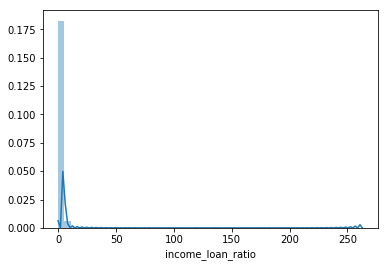

In [162]:
sns.distplot(training.income_loan_ratio)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [164]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.797814919360454
Logistic Reg accuracy: 0.7200746268656717
Test set 
Logistic Reg roc_auc: 0.7977508073280003
Logistic Reg accuracy: 0.7195272727272727



In [165]:
np.shape(training),np.shape(testing)

((500000, 56), (500000, 55))

In [166]:
training.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc,applicant_sex_enc,msa_md_enc,acceptance_rate,Ethnicity_Loan_dev,lender_bin,pop_size,income_loan_ratio
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209,0.269726,181.0,0.488936,0.639175,0.499877,0.520823,0.508505,9.017698e+07,125.276816,1,0.127564,2.800000
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919,0.730274,181.0,0.488936,0.570732,0.484798,0.520823,0.543021,2.016157e+07,4.855860,0,0.127564,3.068966
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.489632,0.730274,181.0,0.488936,0.500000,0.506494,0.520823,0.508886,1.468021e+08,32.276816,1,0.127564,2.397059
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.691964,0.730274,181.0,0.488936,0.534483,0.535882,0.520823,0.544391,1.566512e+08,40.276816,1,0.127564,1.462264
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0.542994,0.269726,181.0,0.488936,0.562016,0.526313,0.466453,0.524821,2.464938e+05,109.723184,0,0.127564,4.236111


In [167]:
# leverage ratio
training['leverage_ratio'] =np.sqrt((training.loan_amount+training.loan_amount + training.acceptance_rate + training.minority_population_pct)*(training.applicant_income + training.state_code+1))/ (training.income_loan_ratio + training.acceptance_rate)
training['braveo'] = np.sqrt(training['leverage_ratio'] / np.absolute(training.lender - np.log(training.acceptance_rate)))
training['trig_metrics']  = np.power(np.sin(training.lender),2) 
training['trig_metrics_cos']  = np.power(np.cos(training.acceptance_rate/2),2) 
training['trig_metrics_tan']  = np.power(np.tanh(training.lender/2),2)

testing['leverage_ratio'] =np.sqrt((testing.loan_amount+testing.loan_amount + testing.acceptance_rate + testing.minority_population_pct)*(testing.applicant_income + testing.state_code+1))/(testing.income_loan_ratio + training.acceptance_rate)
testing['braveo'] = np.sqrt(testing['leverage_ratio'] / np.absolute(testing.lender - np.log(testing.acceptance_rate))) 
testing['trig_metrics']  = np.power(np.sin(testing.lender),2) 
testing['trig_metrics_cos']  = np.power(np.cos(testing.acceptance_rate/2),2) 
testing['trig_metrics_tan']  = np.power(np.tanh(testing.lender),2) 

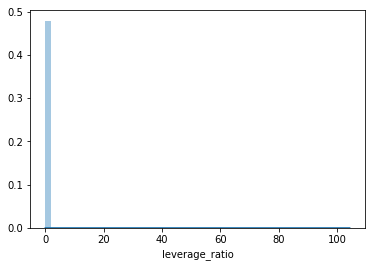

In [168]:
sns.distplot(training.leverage_ratio)

In [169]:
training['trig_metrics'].head()

0    0.196924
1    0.914773
2    0.976059
3    0.371430
4    0.000703
Name: trig_metrics, dtype: float64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [171]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7978280963039333
Logistic Reg accuracy: 0.7200567164179105
Test set 
Logistic Reg roc_auc: 0.7977447704264159
Logistic Reg accuracy: 0.7195939393939393



In [172]:
training.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc,applicant_sex_enc,msa_md_enc,acceptance_rate,Ethnicity_Loan_dev,lender_bin,pop_size,income_loan_ratio,leverage_ratio,braveo,trig_metrics,trig_metrics_cos,trig_metrics_tan
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209,0.269726,181.0,0.488936,0.639175,0.499877,0.520823,0.508505,9.017698e+07,125.276816,1,0.127564,2.800000,0.000829,0.000428,0.196924,0.994773,1.0
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919,0.730274,181.0,0.488936,0.570732,0.484798,0.520823,0.543021,2.016157e+07,4.855860,0,0.127564,3.068966,0.002336,0.000978,0.914773,0.231466,1.0
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.489632,0.730274,181.0,0.488936,0.500000,0.506494,0.520823,0.508886,1.468021e+08,32.276816,1,0.127564,2.397059,0.000729,0.000358,0.976059,0.287074,1.0
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.691964,0.730274,181.0,0.488936,0.534483,0.535882,0.520823,0.544391,1.566512e+08,40.276816,1,0.127564,1.462264,0.000988,0.000410,0.371430,0.640135,1.0
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0.542994,0.269726,181.0,0.488936,0.562016,0.526313,0.466453,0.524821,2.464938e+05,109.723184,0,0.127564,4.236111,0.021058,0.008726,0.000703,0.372574,1.0


In [173]:
testing.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc,applicant_sex_enc,msa_md_enc,acceptance_rate,Ethnicity_Loan_dev,lender_bin,pop_size,income_loan_ratio,leverage_ratio,braveo,trig_metrics,trig_metrics_cos,trig_metrics_tan
0,0,2,1,3,1,115.0,3,101,16,276,2,1,102.389521,6329.000000,59.536,69477.206699,85.78,1874.000000,2410.000000,3791,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.785178,0.730274,181.0,0.488936,0.545946,0.394636,0.520823,0.495576,6.164607e+07,79.906904,1,0.127564,1.112298,0.000951,0.000502,0.615872,0.073353,1.0
1,1,1,1,1,1,252.0,2,87,20,68,2,1,107.000000,2473.000000,8.050,69477.206699,100.00,947.000000,1214.000000,2839,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0.371434,0.269726,181.0,0.488936,0.502415,0.533078,0.520823,0.607497,3.335950e+07,57.093096,0,0.127560,2.333333,0.003241,0.001072,0.707854,0.678734,1.0
2,2,1,1,1,1,270.0,1,410,-1,-1,2,2,119.000000,5416.833956,22.901,69235.603298,100.00,1427.718282,1886.147065,4701,0,0,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.195064,0.269726,181.0,0.488936,0.000000,0.034887,0.466453,0.000000,9.726771e+07,75.093096,1,0.127563,2.250000,0.000733,0.000396,0.853053,0.721593,1.0
3,3,2,1,1,1,179.0,2,376,20,11,2,2,44.000000,4795.000000,29.676,69477.206699,100.00,1426.000000,1765.000000,2153,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0.817891,0.269726,181.0,0.488936,0.563559,0.536532,0.466453,0.527134,1.851857e+07,15.906904,0,0.127563,3.977778,0.000221,0.000322,0.716252,0.775347,1.0
4,4,2,1,1,1,36.0,2,254,48,156,3,3,32.000000,5246.000000,5.110,69477.206699,100.00,1452.000000,2092.000000,5710,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0.489632,0.730274,181.0,0.488936,0.510204,0.527335,0.406054,0.547771,1.124568e+08,163.944760,1,0.127563,1.090909,0.387193,0.008248,0.976059,0.305081,1.0


## credit card equation 

In [174]:
interest = (training.loan_amount*2*e)/100
interest1 = (training.population*2*e)/100
training['credit_card_score'] =  -1*np.log(1 + (training.applicant_income/training.loan_amount) * np.power((1-(1+interest)),30))/(30*np.log(1+interest))
training['credit_random_score'] =  -1*np.log(1 + (training.population/training.loan_amount) * np.power((1-(1+interest1)),60))/(60*np.log(1+interest1))
training['amortization_a'] =  (training.loan_amount * (interest/training.applicant_income))/(1-(1+np.power((interest/training.applicant_income),(-training.applicant_income))))

interestt = (testing.loan_amount*2*e)/100
interestt1 = (testing.population*2*e)/100
testing['credit_card_score'] =  -1*np.log(1 + (testing.applicant_income/testing.loan_amount) * np.power((1-(1+interestt)),30))/(30*np.log(1+interestt))
testing['credit_random_score'] =  -1*np.log(1 + (testing.population/testing.loan_amount) * np.power((1-(1+interestt1)),60))/(60*np.log(1+interestt1))
testing['amortization_a'] =  (testing.loan_amount * (interestt/testing.applicant_income))/(1-(1+np.power((interestt/testing.applicant_income),(-testing.applicant_income))))


In [175]:
#training.drop(columns=['credit_card_accep_score'],axis=1,inplace=True)
#training.head()

In [176]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [177]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set 
Logistic Reg roc-auc: 0.7980279911014506
Logistic Reg accuracy: 0.720044776119403
Test set 
Logistic Reg roc_auc: 0.7979948081703108
Logistic Reg accuracy: 0.7198242424242425



In [178]:
## 1.1.2 applicant county code to state code ratio 
training['county_state_ratio'] = (training.loan_amount+1) / (training.applicant_income + 2) + (1/training.applicant_income)
testing['county_state_ratio'] = (testing.loan_amount+1) / (testing.applicant_income + 2) + (1/testing.applicant_income)
training['county_state_ratio'].tail()

499995    1.708123
499996    0.651419
499997    0.650193
499998    0.861600
499999    0.839351
Name: county_state_ratio, dtype: float64

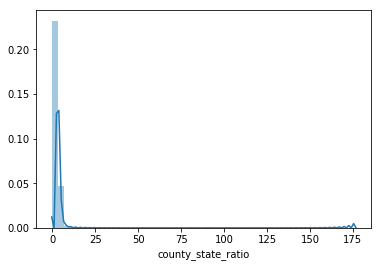

In [179]:
sns.distplot(training['county_state_ratio'])

In [180]:
X_train, X_test, y_train, y_test = train_test_split(training, training.accepted, test_size=0.33, random_state=42)

#get cols names
X_train_cols = list(X_train.columns)
X_test_cols = list(X_test.columns)
#standard scale 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))
# rename the cols of the dataset again since scaler returns a numpy arrray
X_train.columns=X_train_cols
X_test.columns =X_test_cols

In [181]:
# base model

logit = LogisticRegression(random_state=42,C=1000)
logit.fit(X_train.drop(['row_id','accepted'],axis=1),y_train)
print('Train set ')
pred = logit.predict_proba(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = logit.predict(X_train.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = logit.predict_proba(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = logit.predict(X_test.drop(['row_id','accepted'],axis=1))
print('Logistic Reg accuracy: {}'.format(accuracy_score(y_test,pred)))
print()

Train set 
Logistic Reg roc-auc: 0.7982936360293705
Logistic Reg accuracy: 0.7204985074626866
Test set 
Logistic Reg roc_auc: 0.7982658595857987
Logistic Reg accuracy: 0.7203030303030303



In [182]:
training.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc,applicant_sex_enc,msa_md_enc,acceptance_rate,Ethnicity_Loan_dev,lender_bin,pop_size,income_loan_ratio,leverage_ratio,braveo,trig_metrics,trig_metrics_cos,trig_metrics_tan,credit_card_score,credit_random_score,amortization_a,county_state_ratio
0,0,3,1,1,1,70.0,3,18,37,246,2,1,24.0,6203.0,44.2300,69477.206699,50.933,716.0,2642.0,4536,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0.837209,0.269726,181.0,0.488936,0.639175,0.499877,0.520823,0.508505,9.017698e+07,125.276816,1,0.127564,2.800000,0.000829,0.000428,0.196924,0.994773,1.0,-0.950505,-1.010712,-2.236723e-07,2.772436
1,1,1,1,3,1,178.0,3,369,52,299,1,1,57.0,5774.0,15.9050,69477.206699,100.000,1622.0,2108.0,2458,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0.168919,0.730274,181.0,0.488936,0.570732,0.484798,0.520823,0.543021,2.016157e+07,4.855860,0,0.127564,3.068966,0.002336,0.000978,0.914773,0.231466,1.0,-0.978251,-1.008354,-1.824219e-16,3.051442
2,2,2,1,3,1,163.0,3,16,10,306,2,1,67.0,6094.0,61.2700,69477.206699,100.000,760.0,1048.0,5710,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0.489632,0.730274,181.0,0.488936,0.500000,0.506494,0.520823,0.508886,1.468021e+08,32.276816,1,0.127564,2.397059,0.000729,0.000358,0.976059,0.287074,1.0,-0.979257,-1.008642,-5.595441e-27,2.391737
3,3,1,1,1,1,155.0,1,305,47,180,2,1,105.0,6667.0,6.2460,69477.206699,100.000,2025.0,2299.0,5888,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.691964,0.730274,181.0,0.488936,0.534483,0.535882,0.520823,0.544391,1.566512e+08,40.276816,1,0.127564,1.462264,0.000988,0.000410,0.371430,0.640135,1.0,-0.983500,-1.008879,-6.615542e-66,1.467468
4,4,1,1,1,1,305.0,3,24,37,20,2,2,71.0,6732.0,94.4285,69477.206699,82.200,1464.0,1847.0,289,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0.542994,0.269726,181.0,0.488936,0.562016,0.526313,0.466453,0.524821,2.464938e+05,109.723184,0,0.127564,4.236111,0.021058,0.008726,0.000703,0.372574,1.0,-0.982180,-1.007271,-1.331798e-10,4.205865


In [183]:
training.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_sex', 'applicant_income',
       'population', 'minority_population_pct', 'ffiecmedian_family_income',
       'tract_to_msa_md_income_pct', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'lender', 'co_applicant', 'accepted',
       'applicant_income_NA', 'population_NA', 'ffiecmedian_family_income_NA',
       'tract_to_msa_md_income_pct_NA', 'number_of_owner_occupied_units_NA',
       'number_of_1_to_4_family_units_NA', 'applicant_race', 'loan_type__1',
       'loan_type__2', 'loan_type__3', 'loan_type__4', 'loan_purpose__1',
       'loan_purpose__2', 'loan_purpose__3', 'preapproval__1',
       'preapproval__2', 'preapproval__3', 'applicant_ethnicity__1',
       'applicant_ethnicity__2', 'applicant_ethnicity__3',
       'applicant_ethnicity__4', 'lender_enc', 'twice_inc

In [184]:
X = training.drop(columns=['row_id','accepted','county_code'],axis = 1)
test = testing.drop(columns=['row_id','county_code'])
y = new_train.accepted

In [185]:
np.shape(X),np.shape(y),np.shape(test)

((500000, 62), (500000,), (500000, 62))

In [186]:
standard_sc_col = ['loan_amount','applicant_income','population','minority_population_pct','number_of_owner_occupied_units','number_of_1_to_4_family_units']
MinMax_sc_col = list(X.drop(columns=standard_sc_col,axis=1).columns)

In [187]:
st_scaler = StandardScaler()
mM_scaler = MinMaxScaler()

In [188]:
for col in standard_sc_col:
    X[col] = pd.DataFrame(st_scaler.fit_transform(X[col].values.reshape(-1, 1)))
    test[col] = pd.DataFrame(st_scaler.transform(test[col].values.reshape(-1, 1)))
for col in MinMax_sc_col:
    X[col] = pd.DataFrame(mM_scaler.fit_transform(X[col].values.reshape(-1, 1)))
    test[col] = pd.DataFrame(mM_scaler.transform(test[col].values.reshape(-1, 1)))

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Models

In [190]:
seed = 42

In [204]:
score_ls = []

## 6.0  AdaBoostClassifier

In [191]:
# AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators= 200,learning_rate=0.1,random_state=42,algorithm='SAMME.R')
Adaboost.fit(X_train,y_train)
print('Train set')
pred = Adaboost.predict_proba(X_train)
print('Adaboost Reg roc-auc: {}'.format(roc_auc_score(y_train,pred[:,1])))
pred = Adaboost.predict(X_train)
print('Adaboost Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set ')
pred = Adaboost.predict_proba(X_test)
print('Adaboost roc_auc: {}'.format(roc_auc_score(y_test,pred[:,1])))
pred = Adaboost.predict(X_test)
print('Adaboost accuracy: {}'.format(accuracy_score(y_test,pred)))
print()


Train set
Adaboost Reg roc-auc: 0.797755156283985
Adaboost Reg accuracy: 0.7201044776119403
Test set 
Adaboost roc_auc: 0.7966755419017882
Adaboost accuracy: 0.7186545454545454



In [38]:
0.6705636363636364,0.670939393939394,0.6735272727272728,0.6777818181818182,0.6774242424242424,0.7164545454545455

(0.6705636363636364,
 0.670939393939394,
 0.6735272727272728,
 0.6777818181818182,
 0.6774242424242424,
 0.7164545454545455)

In [205]:
#for report purposes only
cl_name = 'Adaboost'
precision = precision_score(y_test, pred, average='binary')
score_ls.append([cl_name, precision, 'Precision'])
recall = recall_score(y_test, pred, average='binary')
score_ls.append([cl_name, recall,'Recall'])
F1 = f1_score(y_test, pred, average='binary')
score_ls.append([cl_name, F1,'f1 Score'])
accuracy = accuracy_score(y_test, pred)
score_ls.append([cl_name, accuracy,'Accuracy'])
roc_auc = roc_auc_score(y_test, pred)
score_ls.append([cl_name, roc_auc,'ROC AUC Score'])
score_ls

[['Adaboost', 0.7046300147252228, 'Precision'],
 ['Adaboost', 0.7567939539544374, 'Recall'],
 ['Adaboost', 0.7297810167991897, 'f1 Score'],
 ['Adaboost', 0.7186545454545454, 'Accuracy'],
 ['Adaboost', 0.7185009091170768, 'ROC AUC Score']]

In [317]:
ada.fit(X,y)
predictions =  ada.predict(test)
predictions = pd.DataFrame(data=predictions)


In [321]:
sample_sub.accepted = predictions
sample_sub.to_csv('pred2_ada.csv',index = False)

## XGB

In [193]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score  #Additional scklearn functions
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
xgb0 = XGBClassifier(n_estimators=200,n_jobs=4,objective= 'binary:logistic')

In [185]:
xgb0.fit(X_train,y_train)
pred = xgb0.predict(X_test)

In [186]:
cl_name = 'XGboost'
precision = precision_score(y_test, pred, average='binary')
score_ls.append([cl_name, precision, 'Precision'])
recall = recall_score(y_test, pred, average='binary')
score_ls.append([cl_name, recall,'Recall'])
F1 = f1_score(y_test, pred, average='binary')
score_ls.append([cl_name, F1,'f1 Score'])
accuracy = accuracy_score(y_test, pred)
score_ls.append([cl_name, accuracy,'Accuracy'])
roc_auc = roc_auc_score(y_test, pred)
score_ls.append([cl_name, roc_auc,'ROC AUC Score'])
score_ls

[['Adaboost', 0.7021331479072271, 'Precision'],
 ['Adaboost', 0.755816059204887, 'Recall'],
 ['Adaboost', 0.7279862786708915, 'f1 Score'],
 ['Adaboost', 0.7164545454545455, 'Accuracy'],
 ['Adaboost', 0.7162959861310614, 'ROC AUC Score'],
 ['XGboost', 0.7015348700214904, 'Precision'],
 ['XGboost', 0.7763880672695006, 'Recall'],
 ['XGboost', 0.7370659025787967, 'f1 Score'],
 ['XGboost', 0.7219272727272728, 'Accuracy'],
 ['XGboost', 0.7217078892250581, 'ROC AUC Score']]

In [46]:
xgb0 = XGBClassifier(n_estimators=100,n_jobs=4,objective= 'binary:logistic')
xgb0.fit(X_train, y_train)
y_pred = xgb0.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('accuracy: {}'.format(accuracy * 100))
# Fit model using each importance as a threshold
thresholds = sort(xgb0.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb0, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier(learning_rate =0.1,n_estimators=200,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=seed,silent=False)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.12f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

accuracy: 77.1460606060606


KeyboardInterrupt: 

In [45]:
68.93151515151516,69.0709090909091,69.3739393939394,72.38969696969697

(68.93151515151516, 69.0709090909091, 69.3739393939394, 72.38969696969697)

In [960]:
selection = SelectFromModel(xgb0, threshold=0.002901609289, prefit=True)
X = selection.transform(X)
test = selection.transform(test)

In [961]:
np.shape(X),np.shape(test)

((500000, 29), (500000, 29))

In [201]:
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=seed,silent=False)

In [202]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 1
        xgtrain = xgb.DMatrix(X.values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='error', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X,y,eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    fig, ax = plt.subplots(figsize=(10,8))
    plot_importance(alg, ax = ax)  
    
    '''feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')'''

In [199]:
X = pd.DataFrame(X)
test = pd.DataFrame(test)
X.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,applicant_ethnicity,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner_occupied_units,number_of_1_to_4_family_units,lender,co_applicant,applicant_income_NA,population_NA,ffiecmedian_family_income_NA,tract_to_msa_md_income_pct_NA,number_of_owner_occupied_units_NA,number_of_1_to_4_family_units_NA,applicant_race,loan_type__1,loan_type__2,loan_type__3,loan_type__4,loan_purpose__1,loan_purpose__2,loan_purpose__3,preapproval__1,preapproval__2,preapproval__3,applicant_ethnicity__1,applicant_ethnicity__2,applicant_ethnicity__3,applicant_ethnicity__4,lender_enc,twice_income,income_classes,income_classes_enc,number_of_1_to_4_family_units_enc,county_code_enc,applicant_sex_enc,msa_md_enc,acceptance_rate,Ethnicity_Loan_dev,lender_bin,pop_size,income_loan_ratio,leverage_ratio,braveo,trig_metrics,trig_metrics_cos,trig_metrics_tan,credit_card_score,credit_random_score,amortization_a,county_state_ratio
0,0.666667,0.0,0.0,0.0,-0.906700,1.0,0.044010,0.716981,0.333333,0.000000,-0.913471,0.294869,0.512255,1.0,0.488987,-1.069879,1.018234,0.696988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.837209,0.0,0.0,0.0,0.639175,0.499877,0.294359,0.508824,0.307193,0.355470,1.0,0.998103,0.010650,0.000007,0.000045,0.196927,0.994773,1.0,0.050074,0.027515,1.0,0.015677
1,0.000000,0.0,1.0,0.0,-0.118640,1.0,0.902200,1.000000,0.000000,0.000000,-0.503708,0.133963,-0.595687,1.0,1.000000,0.320279,0.325925,0.377689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.168919,1.0,0.0,0.0,0.570732,0.484798,0.294359,0.587979,0.068682,0.013672,0.0,0.997933,0.011673,0.000022,0.000104,0.914787,0.231466,1.0,0.022345,0.033510,1.0,0.017258
2,0.333333,0.0,1.0,0.0,-0.228093,1.0,0.039120,0.207547,0.333333,0.000000,-0.379537,0.253986,1.178780,1.0,1.000000,-1.002365,-1.048321,0.877382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.489632,1.0,0.0,0.0,0.500000,0.506494,0.294359,0.509699,0.500090,0.091503,1.0,0.998062,0.009116,0.000006,0.000038,0.976074,0.287074,1.0,0.021340,0.032779,1.0,0.013520
3,0.000000,0.0,0.0,0.0,-0.286468,0.0,0.745721,0.905660,0.333333,0.000000,0.092311,0.468903,-0.973502,1.0,1.000000,0.938639,0.573548,0.904733,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.691964,1.0,0.0,0.0,0.534483,0.535882,0.294359,0.591120,0.533641,0.114210,1.0,0.998261,0.005558,0.000009,0.000043,0.371435,0.640135,1.0,0.017099,0.032176,1.0,0.008283
4,0.000000,0.0,0.0,0.0,0.808060,1.0,0.058680,0.716981,0.333333,0.333333,-0.329869,0.493283,2.475786,1.0,0.814620,0.077846,-0.012451,0.044407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.542994,0.0,0.0,0.0,0.562016,0.526313,0.154912,0.546242,0.000840,0.311323,0.0,0.998282,0.016115,0.000201,0.000925,0.000703,0.372574,1.0,0.018418,0.036264,1.0,0.023799


In [203]:
modelfit(xgb1, X, y)

[0]	train-error:0.3413+0.000457074	test-error:0.341794+0.00124768
[1]	train-error:0.292032+0.000601529	test-error:0.292642+0.000960467
[2]	train-error:0.289688+0.00325739	test-error:0.290646+0.00274751
[3]	train-error:0.286573+0.000869022	test-error:0.287556+0.00047542
[4]	train-error:0.285659+0.000829771	test-error:0.286524+0.000682952
[5]	train-error:0.284501+0.000602879	test-error:0.28523+0.00100008
[6]	train-error:0.283845+0.000656295	test-error:0.284828+0.000358184
[7]	train-error:0.2829+0.000404955	test-error:0.283914+0.000402671
[8]	train-error:0.282779+0.000365191	test-error:0.283686+0.00045138


KeyboardInterrupt: 

In [965]:
0.7416,0.277656+0.000877989 , 0.277852+0.0010421,0.7429

(0.7416, 0.27853398900000004, 0.2788941, 0.7429)

In [970]:
xgb0 = XGBClassifier(n_estimators=1000,n_jobs=-1,objective= 'binary:logistic')
xgb0.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [971]:
predictions =  xgb0.predict(test)
predictions = pd.DataFrame(data=predictions)

In [972]:
sample_sub.accepted = predictions
sample_sub.to_csv('pred5_xgb.csv',index = False)

In [973]:
sample_sub.head()

,row_id,accepted
0,0,1
1,1,1
2,2,0
3,3,1
4,4,0


## lgbm

In [47]:
import lightgbm as lgbm
d_train = lgbm.Dataset(X_train,label=y_train,params = {'metric': 'logloss'})
params = {}
params['learning_rate'] = 0.03
params['objective'] = 'binary'
params['metric'] ='binary_logloss'
params['boosting_type'] ='gbdt'

params['sub_feature'] = 0.5
params['num_class'] = 1
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
params['early_stopping_round'] = 50
params['device'] = 'cpu'


In [190]:
cl_name = 'LightGBM'
precision = precision_score(y_test, pred, average='binary')
score_ls.append([cl_name, precision, 'Precision'])
recall = recall_score(y_test, pred, average='binary')
score_ls.append([cl_name, recall,'Recall'])
F1 = f1_score(y_test, pred, average='binary')
score_ls.append([cl_name, F1,'f1 Score'])
accuracy = accuracy_score(y_test, pred)
score_ls.append([cl_name, accuracy,'Accuracy'])
roc_auc = roc_auc_score(y_test, pred)
score_ls.append([cl_name, roc_auc,'ROC AUC Score'])
score_ls

[['Adaboost', 0.7021331479072271, 'Precision'],
 ['Adaboost', 0.755816059204887, 'Recall'],
 ['Adaboost', 0.7279862786708915, 'f1 Score'],
 ['Adaboost', 0.7164545454545455, 'Accuracy'],
 ['Adaboost', 0.7162959861310614, 'ROC AUC Score'],
 ['XGboost', 0.7015348700214904, 'Precision'],
 ['XGboost', 0.7763880672695006, 'Recall'],
 ['XGboost', 0.7370659025787967, 'f1 Score'],
 ['XGboost', 0.7219272727272728, 'Accuracy'],
 ['XGboost', 0.7217078892250581, 'ROC AUC Score'],
 ['LightGBM', 0.7024980992722928, 'Precision'],
 ['LightGBM', 0.7808549939032488, 'Recall'],
 ['LightGBM', 0.7396069776616485, 'f1 Score'],
 ['LightGBM', 0.7239818181818182, 'Accuracy'],
 ['LightGBM', 0.7237527169250937, 'ROC AUC Score']]

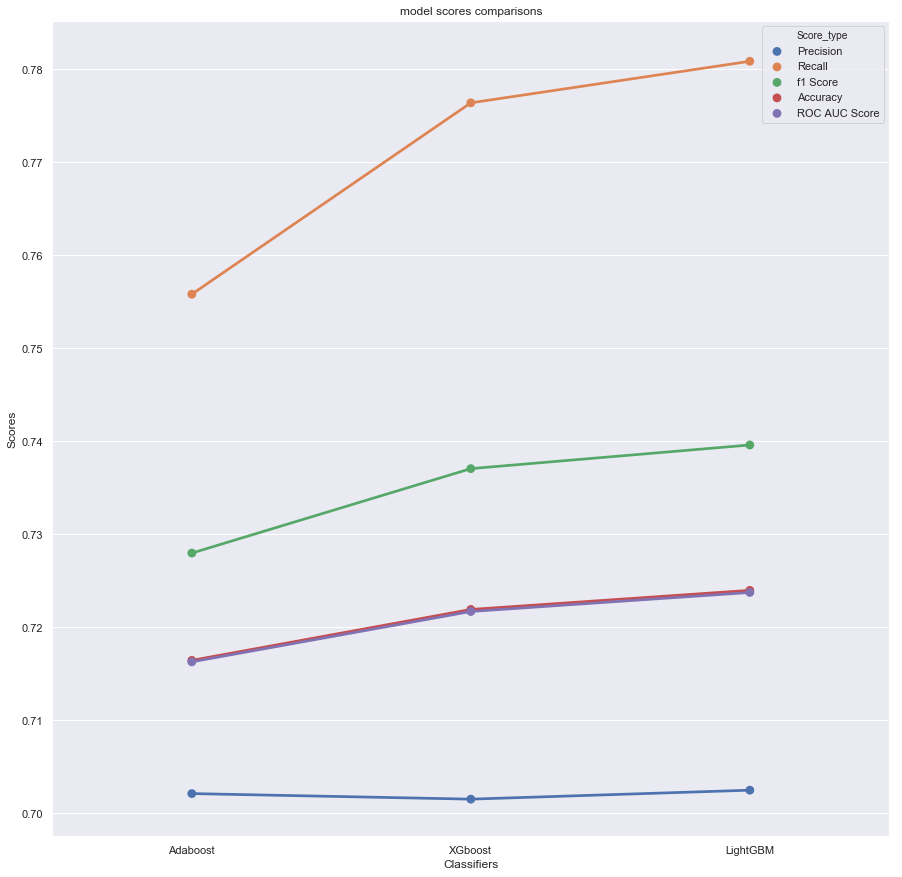

In [217]:
metrics_df = pd.DataFrame(score_ls, columns=['Classifiers','Scores','Score_type']) #building a dataframe with various metrics
plt.figure(figsize=(15, 15))
plt.title('model scores comparisons')
ax = sns.pointplot(x="Classifiers", y="Scores", hue="Score_type", data=metrics_df, linewidth=2.5) #producing the boxplot
#metrics_df.to_pickle(onput_path + 'metrics_df.pkl') #saving results

In [222]:
from sklearn.metrics import confusion_matrix as CM

In [227]:

def plot_confusion_matrix(CM, labels, Norm='True', Cmap=plt.cm.Blues, Fig_counter=1, Title='LightGBM Confusion Matrix'):
#******************************************************************************
    #Plots the confusion matrix as a chessed graph with colors instead of numbers
    #INPUT: 1) Confusion Matrix
    #       2) Vector of labels
    #       3) Normalization of Confusion Matrix
    #       4) Colormap
    #       5) Title of plot
    #OUTPUT: Confusion matrix plot
#******************************************************************************
	if Norm == 'True':
	    CM = CM.astype('float')/CM.sum(axis=0)[np.newaxis,:] #Normalize the matrix along the TRUE label axis
	#end
	plt.figure(Fig_counter,figsize=(7,5))
	plt.imshow(CM, interpolation='nearest', cmap=Cmap) #create the graph and set the interpolation
	plt.title(Title) #adding the title
	plt.colorbar() #additing the colorbar
	if Norm == 'True':
	   plt.clim(0,1) #Set the colorbar limits
	#end    
	tick_marks = np.arange(len(labels)) #defininig the tick marks
	plt.xticks(tick_marks, labels) #apply the labels to marks
	plt.yticks(tick_marks, labels) #apply the labels to marks
	plt.ylabel('True label') #adding the y-axis title
	plt.xlabel('Predicted label') #adding the x-axis title
#end

Recall =  0.78


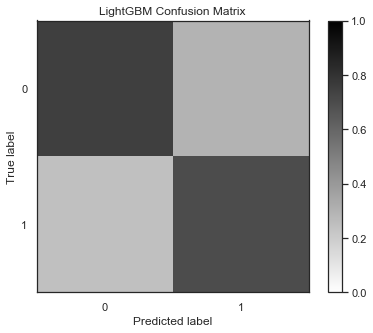

In [233]:
#---------------------------
# Producing the Confusion Matrix
#---------------------------
#Classifier.fit(train_signals, train_labels) #fitting the classifier
predicted_responses = pd.DataFrame(lgbm.predict(X_test)) #applying predictions
predicted_responses = np.round(predicted_responses).astype(np.int64)
conf_mat = CM(y_test, predicted_responses,np.unique(y_train)) #building the confusion matrix
labels = np.unique(y_train.astype(int).astype(str)).tolist() #extracting the labels
sns.set_style('white') #setting the plotting style
plot_confusion_matrix(conf_mat, labels, Norm='True', Cmap=plt.cm.gray_r, Fig_counter=1, Title='LightGBM Confusion Matrix') #calls the confusion matrix routine with the test set and prediction set
precision = precision_score(y_test, predicted_responses, average='binary')
recall = recall_score(y_test, predicted_responses, average='binary')
#print 'Precision ={:.2f}'.format(precision)
#print('Logistic Reg accuracy: {}'.format(accuracy_score(y_train,pred)))
print ('Recall =  {:.2}'.format(recall))

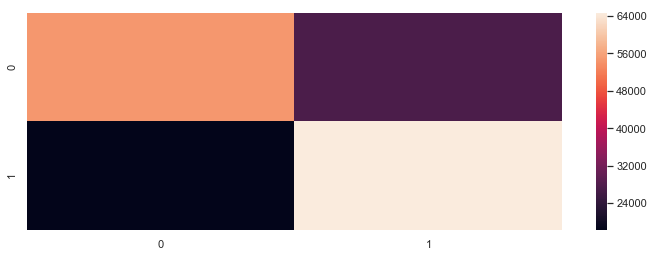

In [314]:
sns.heatmap(conf_mat)

In [315]:
conf_mat

array([[54778, 27391],
       [18152, 64679]], dtype=int64)

In [304]:

def cross_valid_roc(X, y, Classifier, Folds = 5, Title = ''):

	from scipy import interp
	from sklearn import svm, datasets
	from sklearn.metrics import roc_curve, auc
	from sklearn.model_selection import StratifiedKFold

	# Run classifier with cross-validation and plot ROC curves
	cv = StratifiedKFold(n_splits=5)
	cv.get_n_splits(X,y)
	#cv = cv.split(X,y)
	mean_tpr = 0.0
	mean_fpr = np.linspace(0, 1, 100)
	all_tpr = []

	for i, (train_index, test_index) in enumerate(cv.split(X,y)):
	    probas_ = Classifier.fit(X.loc[train_index], y.loc[train_index]).predict_proba(X.loc[test_index])
	    fpr, tpr, thresholds = roc_curve(y.loc[test_index], probas_[:, 1])
	    mean_tpr += interp(mean_fpr, fpr, tpr)
	    mean_tpr[0] = 0.0
	    roc_auc = auc(fpr, tpr)
	    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
	#end

	plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

	mean_tpr /= 5
	mean_tpr[-1] = 1.0
	mean_auc = auc(mean_fpr, mean_tpr)
	plt.plot(mean_fpr, mean_tpr, 'k--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

	plt.xlim([-0.05, 1.05])
	plt.ylim([-0.05, 1.05])
	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title(Title)
	plt.legend(loc="lower right")
#end


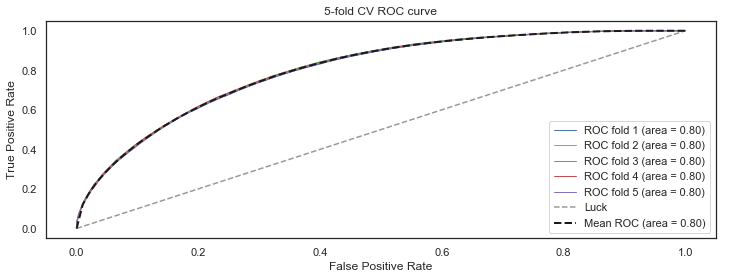

In [305]:
#---------------------------
# Plotting Cross Validated ROC
#---------------------------
cross_valid_roc(X,y,xgb0, Folds = 5, Title = '5-fold CV ROC curve') #calling the function to plot the cross-validated ROC
#---------------------------

In [306]:

def plot_learning_curves(Estimator, X, y, title='', ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
#******************************************************************************
	"""
	Generate a plot of the test and traning learning curve.

	Parameters
	----------
	Estimator : object type that implements the "fit" and "predict" methods
	    An object of that type which is cloned for each validation.

	title : string
	    Title for the chart.

	X : array-like, shape (n_samples, n_features)
	    Training vector, where n_samples is the number of samples and
	    n_features is the number of features.

	y : array-like, shape (n_samples) or (n_samples, n_features), optional
	    Target relative to X for classification or regression;
	    None for unsupervised learning.

	ylim : tuple, shape (ymin, ymax), optional
	    Defines minimum and maximum yvalues plotted.

	cv : integer, cross-validation generator, optional
	    If an integer is passed, it is the number of folds (defaults to 3).
	    Specific cross-validation objects can be passed, see
	    sklearn.cross_validation module for the list of possible objects
	"""
#******************************************************************************
	plt.figure()
	plt.title(title)
	if ylim is not None:
	    plt.ylim(*ylim)
	plt.xlabel("Training examples")
	plt.ylabel("Score")
	train_sizes, train_scores, test_scores = learning_curve(Estimator, X, y, cv=cv, train_sizes=train_sizes)
	train_scores_mean = np.mean(train_scores, axis=1)
	train_scores_std = np.std(train_scores, axis=1)
	test_scores_mean = np.mean(test_scores, axis=1)
	test_scores_std = np.std(test_scores, axis=1)
	plt.grid()

	plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
	                 train_scores_mean + train_scores_std, alpha=0.1,
	                 color="r")
	plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
	                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
	plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
	         label="Training score")
	plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
	         label="Cross-validation score")

	plt.legend(loc="best")
	return plt
#end


In [311]:
from sklearn.model_selection import cross_validate

In [312]:
#---------------------------
# Plotting learning curve
#---------------------------
test_size_rt = 0.2
random_state = np.random.RandomState(0) # Define a random state
#Classifier = RandomForestClassifier(n_estimators=100, class_weight='auto', random_state=random_state, oob_score=True)
title = "Learning Curves for LigthGBM"
cross_val = cross_validate.ShuffleSplit(X.shape[0], n_iter=10, \
	                               test_size=test_size_rt, random_state=random_state) # Cross validation with 10 iterations and 20% test size
plot_learning_curves(xgb0, X, y, title = title, ylim=(0.0, 1.01), cv=cross_val)
#---------------------------

AttributeError: 'function' object has no attribute 'ShuffleSplit'

In [48]:
lgb_eval = lgbm.Dataset(X_test,y_test,reference=d_train)
model = lgbm.train(params,d_train,num_boost_round= 100000,valid_sets=lgb_eval,early_stopping_rounds=70)

[1]	valid_0's binary_logloss: 0.685142
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.675656
[3]	valid_0's binary_logloss: 0.668768
[4]	valid_0's binary_logloss: 0.663034
[5]	valid_0's binary_logloss: 0.656272
[6]	valid_0's binary_logloss: 0.648061
[7]	valid_0's binary_logloss: 0.643064
[8]	valid_0's binary_logloss: 0.638352
[9]	valid_0's binary_logloss: 0.635727
[10]	valid_0's binary_logloss: 0.630031
[11]	valid_0's binary_logloss: 0.627665
[12]	valid_0's binary_logloss: 0.622375
[13]	valid_0's binary_logloss: 0.617081
[14]	valid_0's binary_logloss: 0.613016
[15]	valid_0's binary_logloss: 0.611161
[16]	valid_0's binary_logloss: 0.605119
[17]	valid_0's binary_logloss: 0.601523
[18]	valid_0's binary_logloss: 0.597357
[19]	valid_0's binary_logloss: 0.594031
[20]	valid_0's binary_logloss: 0.592618
[21]	valid_0's binary_logloss: 0.588594
[22]	valid_0's binary_logloss: 0.587193
[23]	valid_0's binary_logloss: 0.582097
[24]	valid_0's binary_loglo

In [228]:
0.54527,0.547685,0.538855,0.537253,0.538141,0.536733,0.520341

(0.54527, 0.547685, 0.538855, 0.537253, 0.538141, 0.536733, 0.520341)

In [58]:
d_train = lgbm.Dataset(X,label=y)
params = {}
params['learning_rate'] = 0.03
params['objective'] = 'binary'
params['metric'] ='binary_logloss'
params['boosting_type'] ='gbdt'

params['sub_feature'] = 0.5
params['num_class'] = 1
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
#params['early_stopping_round'] = 50
params['device'] = 'cpu'

In [60]:
model = lgbm.train(params,d_train,num_boost_round= 4226)


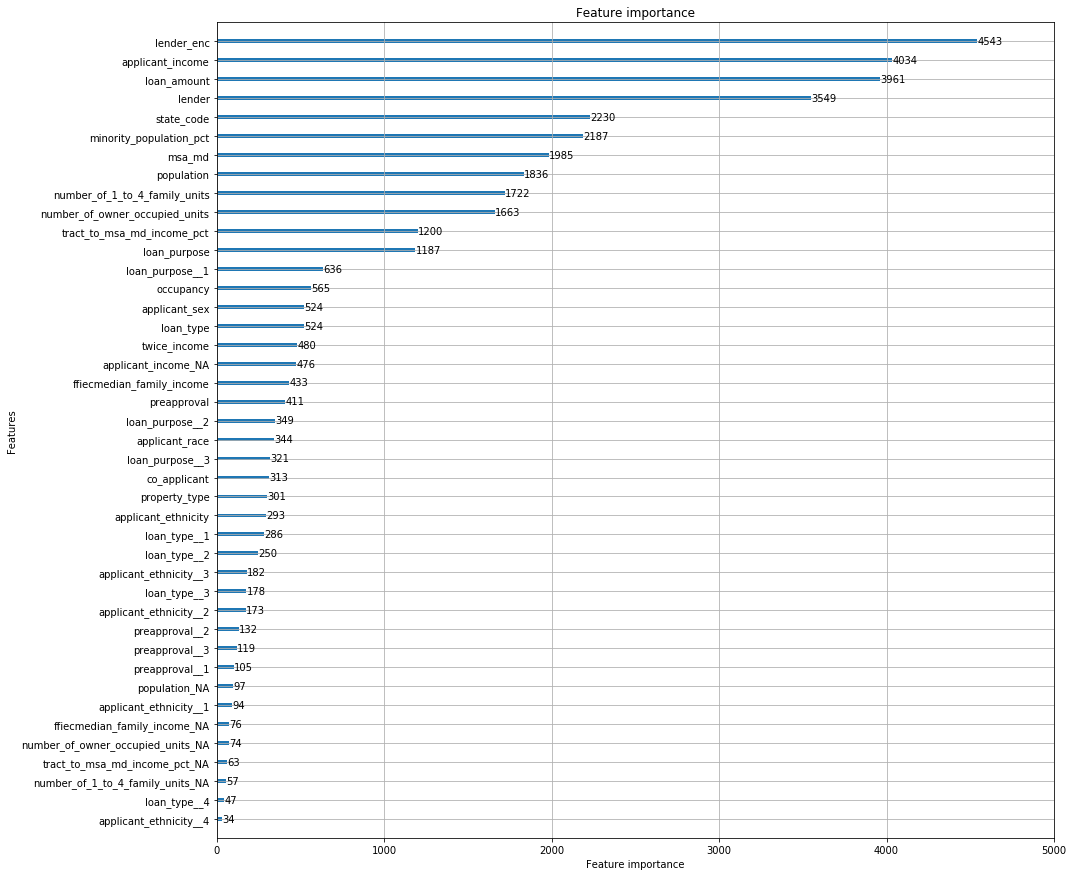

In [61]:
fig, ax = plt.subplots(figsize=(15,15))
lgbm.plot_importance(model,importance_type = 'split',max_num_features = len(X.columns),ax=ax)
#lgbm.plot_importance(model,importance_type = 'gain',max_num_features = len(X.columns),ax=ax)

In [62]:
predictions =  model.predict(test)
predictions = pd.DataFrame(data=predictions)

In [63]:
sample_sub.accepted = np.round(predictions).astype(np.int64)
sample_sub.head()

,row_id,accepted
0,0,1
1,1,1
2,2,1
3,3,1
4,4,0


In [64]:
sample_sub.to_csv('pred11_lgbm.csv',index = False)

In [239]:
from catboost import CatBoostClassifier

In [255]:
catb = CatBoostClassifier(iterations=1000,learning_rate=1,depth=2)

In [250]:
catb.fit(X,y)

0:	learn: 0.5912193	total: 240ms	remaining: 3m 59s
1:	learn: 0.5686091	total: 545ms	remaining: 4m 32s
2:	learn: 0.5608088	total: 810ms	remaining: 4m 29s
3:	learn: 0.5560912	total: 1.08s	remaining: 4m 30s
4:	learn: 0.5533729	total: 1.37s	remaining: 4m 33s
5:	learn: 0.5506040	total: 1.65s	remaining: 4m 33s
6:	learn: 0.5481300	total: 1.94s	remaining: 4m 34s
7:	learn: 0.5441468	total: 2.23s	remaining: 4m 36s
8:	learn: 0.5432263	total: 2.49s	remaining: 4m 34s
9:	learn: 0.5425790	total: 2.77s	remaining: 4m 33s
10:	learn: 0.5414609	total: 3.02s	remaining: 4m 31s
11:	learn: 0.5406800	total: 3.27s	remaining: 4m 29s
12:	learn: 0.5396553	total: 3.53s	remaining: 4m 27s
13:	learn: 0.5391696	total: 3.81s	remaining: 4m 28s
14:	learn: 0.5387992	total: 4.07s	remaining: 4m 27s
15:	learn: 0.5382509	total: 4.32s	remaining: 4m 25s
16:	learn: 0.5358857	total: 4.57s	remaining: 4m 24s
17:	learn: 0.5357131	total: 4.83s	remaining: 4m 23s
18:	learn: 0.5355379	total: 5.1s	remaining: 4m 23s
19:	learn: 0.5352407	to

In [253]:
sample_sub.accepted = np.round(predictions).astype(np.int64)
sample_sub.head()

,row_id,accepted
0,0,1
1,1,1
2,2,0
3,3,1
4,4,0


In [254]:
sample_sub.to_csv('pred2_catb.csv',index = False)

In [ ]:
#******************************************************************************
# Models Comparison
#******************************************************************************
#---------------------------
# Building a list of classifier_dc to compare
#---------------------------
classifier_ls = ['Logistic_Regression', 'Random_Forest', 'Gradient_Boosting', 'K_NN']
classifier_dc = {
               'Logistic_Regression': LogisticRegression(class_weight='auto'),
               'Random_Forest': RandomForestClassifier(n_estimators=50, class_weight='auto'),
               'Gradient_Boosting': GradientBoostingClassifier(max_depth=5),
               'K_NN': KNeighborsClassifier(n_neighbors=5, weights='distance'),
               }
n_trials = 25
test_size_rt = 0.2
#---------------------------

#---------------------------
# Calculating model performances for different models and several cv sets
#---------------------------
score_ls = []
for ic, (cl_name, Classifier) in enumerate(classifier_dc.items()):
	for trial in range(n_trials):
		train_signals, test_signals, train_labels, test_labels = train_test_split(resampled_signals_df, resampled_response_sr, test_size=test_size_rt)
		Classifier.fit(train_signals, train_labels)
		pred_labels = Classifier.predict(test_signals)
		precision = precision_score(test_labels, pred_labels, average='binary')
		score_ls.append([cl_name, precision, 'Precision'])
		recall = recall_score(test_labels, pred_labels, average='binary')
		score_ls.append([cl_name, recall,'Recall'])
		F1 = f1_score(test_labels, pred_labels, average='binary')
		score_ls.append([cl_name, F1,'f1 Score'])
		if (trial+1)%5==0:
			print (trial+1)*4, '%'
			sys.stdout.flush()
		#end
	#end
#end

## stacking

In [1258]:
stacked1= pd.read_csv('pred6_lgbm.csv')
stacked2= pd.read_csv('pred5_lgbm.csv')
stacked3= pd.read_csv('pred5_xgb.csv')

In [1260]:
stacking = pd.concat([stacked1,stacked2.accepted,stacked3.accepted],axis=1)
stacking.head()

,row_id,accepted,accepted,accepted
0,0,1,1,1
1,1,1,1,1
2,2,0,0,0
3,3,1,1,1
4,4,0,0,0


In [1263]:
stacked1.accepted=stacking.transpose().mode().transpose()

In [1264]:
stacked1.to_csv('stacked.csv',index = False)

In [1265]:
stacked1.head()

,row_id,accepted
0,0,1
1,1,1
2,2,0
3,3,1
4,4,0
